# **REVENUE STRATEGY FOR DIGITAL PLATFORMS**

### **Flow of the Project:**

*   Understanding and cleaning the data
*   Data Insights
*   Customer Segmentation
*   Market Strategy

## **Problem Statement**

The US Digital market is estimated at 115.3 billion dollars in 2021. According to data, about 43% of the US population use streaming devices (1).
Thus it is important to stand out and attract a large number of users to gain maximum profits and not be overtaken by other competitors. We have used the Deloitte Digial Data to get a deeper understanding of user streaming activities. Every person based on their gender, age group, location , income group have certain unique characteristics. We used this data to find such trends and insights about user activity so that the digital platform can provide more personalized experience to the user. The end goal is customer satisfaction. If we divide our data into clusters, we can estimate what cluster our future customer will fall into and provide him/her that personalized feature. Supervised learning using classification models can help us achieve this goal.
Thus, the major problem we are solving here is uniformity in the subscription packages offered by streaming platforms. Every user has different demands and needs. We intend to find insights from the clusters and machine learning algorithms and come up with subscription schemes that are tailored for our users. This will help us stay ahead of our competition.

References: 1. https://www.comparitech.com/tv-streaming/streaming-statistics/

## **Benefits of our Solution** <br>
If our subscription packages are personalized in nature our revenues will increase and we will be able to attract more customers to use our products. This will be beneficial to the users since they would get a package as per their budget and needs. For example, in India a lot of people used to use their smartphones for streaming content. Netflix recognized this popularity and came up with a lower cost plan that would be used for streaming on mobile phones only. This made the users who only use smartphones want to buy a Netflix subscription. Similarly we can identify streaming patterns of users and find a way to reduce prices or offer more features to increase customer base. In some scenarios if we see a large difference in watching patterns by region, we can personalize content by showing more shows of that region to connect with our audiences at a deeper level.<br><br>
This would also be beneficial to the streaming platform since more customers equates to more profit. In the same Netflix example, they increased their revenue by getting more customers who only use smartphones to stream content and were previously not using Netflix due to its high cost. It might also be useful to understand how users perceive advertisements as that would help streaming platform generate revenue through advertisements <br><br>
Finally, solving this problem could indirectly help increase the economy as streaming platforms would get more popular thus generating more profits and more employment opportunities.




## **Understanding the data**

Importing the libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the csv file and storing it in a dataframe

In [205]:
data = pd.read_excel('DDS11_Data_Extract_with_labels.xlsx')
data.head()

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit",Q89 - Which of the following is your most frequently used mechanism to get news?,FINAL WEIGHTS
0,4.0,36.0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,No,...,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Magazine,0.083025
1,6.0,26.0,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Print newspapers,0.104475
2,9.0,32.0,Female,27-33,New Jersey,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree strongly,News aggregators,0.312870
3,11.0,25.0,Female,20-26,California,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Online version of newspapers,2.163659
4,3.0,28.0,Male,27-33,Indiana,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Disagree somewhat,N/A; I do not have a basis to answer,Disagree somewhat,Disagree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,Online version of newspapers,0.705765


We have used the Deloitte Digital Democracy Data (2011) for our analysis.





Finding out the number of rows and columns in the data

In [206]:
data.shape

(2131, 198)

The dataset has 2131 rows and 198 columns.

Exploring the data by finding out the column names

In [207]:
list(data.columns)

['record - Record number',
 'Q1r1 - To begin, what is your age?',
 'Q4 - What is your gender?',
 'age - you are...',
 'Q2 - In which state do you currently reside?',
 'region - Region',
 'QNEW3 - What is your employment status?',
 'Q5 - Which category best describes your ethnicity?',
 'QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?',
 'QNEW2 - How old are the children in your home?-0-4 years',
 'QNEW2 - How old are the children in your home?-5-9 years',
 'QNEW2 - How old are the children in your home?-10-13 years',
 'QNEW2 - How old are the children in your home?-14-18 years',
 'QNEW2 - How old are the children in your home?-19-25 years',
 'QNEW2 - How old are the children in your home?-26+ years',
 "QNEW2 - How old are the children in your home?-Don't Know",
 'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.',


We have divided the entire dataset into two parts after exploring the column names. The two parts are:
Demographic Data and Features

Preparing the demographic data. 
The demographic data has a lot of columns that provide redundant information. For example: Do you have children in your home followed by 7 columns that ask the age group of the children, which is not needed and does not provide any deeper understanding. Thus, in our demographic data we have not considered those columns in the middle and directly taken the income column.

In [208]:
df_demo= data[data.columns[1:9]]
Income = data['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.']
df_demo = df_demo.join(Income)

Also, knowing the individual ages of the customers provides a lot of data and makes clustering/grouping data very difficult. Thus, we drop that column and only keep the column that tells us the age group of the customers.

In [209]:
df_demo = df_demo.drop('Q1r1 - To begin, what is your age?', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [210]:
df_demo.head()

,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential."
0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"
1,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"
2,Female,27-33,New Jersey,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999"
3,Female,20-26,California,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999"
4,Male,27-33,Indiana,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"


Renaming the columns so that we get a clean dataframe and better understand our data.

In [211]:
df_demo = df_demo.set_axis(['Gender', 'Age-Group', 'State', 'Region', 'Employment-Status', 'Ethnicity', 'Children in Home','Annual Household Income' ], axis=1, inplace=False)
df_demo.head()

,Gender,Age-Group,State,Region,Employment-Status,Ethnicity,Children in Home,Annual Household Income
0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"
1,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"
2,Female,27-33,New Jersey,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999"
3,Female,20-26,California,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999"
4,Male,27-33,Indiana,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"


In [212]:
income = []
for i in df_demo['Annual Household Income']:
    if i!= "Do not know":
        if i == "Less than $29,999":
            income.append("Poor")
        if i == "$30,000 to $49,999":
            income.append("Middle-Class")
        if i == "$50,000 to $99,999":
            income.append("Upper-Middle-Class")
        if i == "$100,000 to $299,999":
            income.append("Rich")
        if i == "More than $300,000":
            income.append("Very Rich")
    else:
        income.append(None)
df_demo['Economic Class System'] = income
df_demo.head()

,Gender,Age-Group,State,Region,Employment-Status,Ethnicity,Children in Home,Annual Household Income,Economic Class System
0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999",Upper-Middle-Class
1,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999",Upper-Middle-Class
2,Female,27-33,New Jersey,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999",Poor
3,Female,20-26,California,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999",Poor
4,Male,27-33,Indiana,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999",Upper-Middle-Class


# **Data Preprocessing**

As we have seen earlier , there are 198 columns in the dataset. To perform visualizations and make charts, we had divided the entire data among all the group members. All group members analyzed a certain number of columns and gained insights. We have renamed the maximum number of columns to understand the features better. We have also checked for null values and replaced them with 0 wherever possible. All this was done as part of data cleaning. As a part of data preprocessing , we have also converted all the categorical data into numerical data using either label encoding, replace function or one hot encoding. We even dropped those columns that provided redundant information.

Preprocessing columns of dataframe by parts based on categories such as watch patterns, entertainment, smartphone usage, spending choices  etc

In [213]:
#renaming columns

df = data[list(data.columns)[17:-1]]

question_dict = {
                 'Q8': 'Home Entertainment',
                 'Q10': 'Future Purchase',
                 'Q11': 'Owned, Value Rank',
                  'Q15': '%Time Spent: Movies',
                 'Q16': '%Time Spent: Sports',
                 'Q17': '%Time Spent: TV Shows',
                 'Q22': 'Frequent Apps',
                 'Q26':'Household Subscription',
                 'Q36':'Subscription Value Rank',
                 'Q29': 'Pay for double download speed',
                 'Q37': 'Preferred Entertainment Rank',
                 'QNEW19':'Movie watch - method',
                 'QNEW20':'Television Watch - Method',
                 'QNEW24':'Binge Watch',
                  'QNEW28':'Borrow Subscription',
                 'QNEW29':'Borrowed Subscription: Content',
                 'Q73':'Task while TV',
                 'Q39':'Pay for Ads',
                 'Q89':'Frequent News Mechanism'
                 }

for col in df.columns:
  c = col.split("-")[0].strip()
  if 'r' in c:
    c = c.split('r')[0]
  if any(c == key for key in question_dict.keys()):
    split_list = col.split("-",2)
    if len(split_list) == 2:
      df.rename(columns={col:c+" - "+question_dict[c]}, inplace = True)
    elif len(split_list[1])<len(split_list[2]) and c!='Q22':
      df.rename(columns={col:c+" - "+question_dict[c]+" - "+split_list[1].strip()}, inplace=True)
    elif len(split_list[1])>len(split_list[2]) and (col.split("-")[0].strip() not in ['Q39r2','Q39r3','Q39r4']):
      df.rename(columns={col:c+" - "+question_dict[c]+" - "+split_list[2].strip()}, inplace=True)
    elif (col.split("-")[0].strip() in ['Q39r2','Q39r3','Q39r4']):
      df.rename(columns={col:c+" - "+question_dict[c]+" - "+split_list[1].strip()}, inplace=True)

In [214]:
for col in df.columns:
  if any(x in col for x in ['None of the above', "Don't know", "I do not use any of the above"]):
    df.drop(col, axis=1, inplace=True)

In [215]:
#storing columns corresponding to each category in a dictionary for reference
dem_info = list(df_demo.columns)
qcols_dict = {}

for col1 in question_dict.keys():
  c = []
  for col2 in df.columns:
    if col1.strip() == col2.split("-")[0].strip():
      c.append(col2)
  qcols_dict[col1] = c

In [216]:
#Imputing missing values with 0
df.fillna(0,inplace=True)

In [217]:
#data preprocessing part1
df_entertain = df[qcols_dict['Q37']+qcols_dict['QNEW19']+qcols_dict['QNEW20']+qcols_dict['QNEW24']+qcols_dict['QNEW28']]
df_entertain1=df_entertain.set_axis(['Attending live performances','Going to the movies','Watching television','Listening to music','Reading books','Reading magazines',\
                         'Reading newspapers','Listening to the radio','Playing video games','Using the Internet','Rent a physical DVD/Blu-ray movie',\
                         'Purchase a physical DVD/Blu-ray movie','Purchase digital video entertainment movie','Rent digital video entertainment movie','Watch digital video entertainment movie','Purchase/rent a video via set-top-box movie',\
                         'Rent a physical DVD/Blu-ray tv','Purchase a physical DVD/Blu-ray tv','Purchase digital video entertainment tv','Watch digital video entertainment tv','Purchase/rent a video via set-top-box tv','Binge watch shows?','Use someone elses subscription'], axis=1, inplace=False)


#For the questions based on choice let us understand the distribution to identify what people like doing the most
df_choice=df_entertain1[df_entertain1.columns[:10]]
df_choice=df_choice.astype(int)

choices=df_choice['Attending live performances'].value_counts().reset_index().merge(df_choice['Going to the movies'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Watching television'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Listening to music'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Reading books'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Reading magazines'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Reading newspapers'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Playing video games'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Using the Internet'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_choice['Listening to the radio'].value_counts().reset_index(),on='index',how='left')
choices=choices.rename(columns={'index':'choices'})
choices=choices.set_index('choices')
choices.head()


,Attending live performances,Going to the movies,Watching television,Listening to music,Reading books,Reading magazines,Reading newspapers,Playing video games,Using the Internet,Listening to the radio
choices,,,,,,,,,,
0,1703,1559,865,1347,1562,1887,1712,1546,947,1789
1,147,191,570,208,183,43,110,175,430,74
3,146,217,317,284,199,115,166,220,323,144
2,135,164,379,292,187,86,143,190,431,124


In [218]:
#data preprocessing part2

df_buy= data[data.columns[38:59]]
df_buy = df_buy.set_axis(['Buy_TV', 'Buy_DVR', 'Buy_Streaming_Media_Box', 'Buy_Portable_Streaming_Drive ', 'Buy_Over-the-air_digital_TV_antenna', 'Buy_DVD_Player', 'Buy_Gaming_Console','Buy_Portable_Video_Game_Player','Buy_Router', 'Buy_Desktop_Computer','Buy_Laptop', 'Buy_Tablet','Buy_Dedicated_e-book_reader', 'Buy_SmartPhone', 'Buy_Basic_MobilePhone', 'Buy_SmartWatch', 'Buy_FitinessBand', 'Buy_VR', 'Buy_Drone', 'Buy_None', 'Buy_DontKnow'], axis=1, inplace=False)
for i in df_buy.columns:
    df_buy[i] = df_buy[i].replace({'No': 0, 'Yes': 1}).astype(int)
df_buy = df_buy.drop(['Buy_None', 'Buy_DontKnow'], axis =1)

df_value= data[data.columns[59:78]]
df_value = df_value.fillna(0)
df_value = df_value.set_axis(['Rank_TV', 'Rank_DVR', 'Rank_Streaming_Media_Box', 'Rank_Portable_Streaming_Drive ', 'Rank_Over-the-air_digital_TV_antenna', 'Rank_DVD_Player', 'Rank_Gaming_Console','Rank_Portable_Video_Game_Player','Rank_Router', 'Rank_Desktop_Computer','Rank_Laptop', 'Rank_Tablet','Rank_Dedicated_e-book_reader', 'Rank_SmartPhone', 'Rank_Basic_MobilePhone', 'Rank_SmartWatch', 'Rank_FitinessBand', 'Rank_VR', 'Buy_Drone'], axis=1, inplace=False)
for i in df_value.columns:
    df_value[i] = df_value[i].replace({0: 0, 1: 3, 2: 2, 3: 1})
   
df_whileTv= data[data.columns[175:187]]
df_whileTv = df_whileTv.set_axis(['read(school)_while_watching_Tv', 'read(pleasure)_while_watching_Tv', 'browse_web_while_watching_TV', 'Microblogging_while_watching_TV', 'read(email)_while_watching_TV', 'write(email)_while_watching_Tv', 'text_message_while_watching_TV', 'social_media_while_watching_TV', 'call_while_watching_TV','browse_product_while_watching_TV','purchase_products_while_watching_TV','play_videogames_while_watching_TV'], axis =1, inplace= False)
df_whileTv.head()
for i in df_whileTv.columns:
    df_whileTv[i] = df_whileTv[i].replace({'Always (close to 100% of the time)': 0, 'Almost always (greater than 75% of the time)': 1, 'Frequently (between 50% and 75% of the time)' : 2, 'Rarely (10%-50% of the time)':3, 'Almost never': 4}).astype(int)
df_whileTv.reset_index(drop=True, inplace=True)
for i in df_whileTv.columns:
    df_whileTv[i] = df_whileTv[i].replace({0: 0, 1: 3, 2: 2, 3: 1})
   
l1=df_whileTv.values.tolist()
l2=df_value.values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])

df11 =pd.DataFrame(l1,columns=df_whileTv.columns.tolist()+df_value.columns.tolist())

l1=df11.values.tolist()
l2=df_buy.values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])

df22 =pd.DataFrame(l1,columns=df11.columns.tolist()+df_buy.columns.tolist())

df22.head()

,read(school)_while_watching_Tv,read(pleasure)_while_watching_Tv,browse_web_while_watching_TV,Microblogging_while_watching_TV,read(email)_while_watching_TV,write(email)_while_watching_Tv,text_message_while_watching_TV,social_media_while_watching_TV,call_while_watching_TV,browse_product_while_watching_TV,...,Buy_Desktop_Computer,Buy_Laptop,Buy_Tablet,Buy_Dedicated_e-book_reader,Buy_SmartPhone,Buy_Basic_MobilePhone,Buy_SmartWatch,Buy_FitinessBand,Buy_VR,Buy_Drone
0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,1
1,1.0,1.0,1.0,2.0,2.0,1.0,3.0,0.0,3.0,2.0,...,0,0,0,1,0,0,0,1,0,0
2,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,...,0,0,1,0,1,0,0,0,0,0
3,2.0,1.0,3.0,2.0,2.0,1.0,0.0,1.0,3.0,0.0,...,0,0,0,1,0,0,1,1,1,1
4,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [219]:
#data preprocessing part3

ds=data[data.columns[79:91]]
ds.head()

pd.options.mode.chained_assignment = None
ds1=ds[ds.columns[0:4]]
ds1['Where do you spend the most time watching movies?']=0
for i in range (0,len(ds1)):
    ds1['Where do you spend the most time watching movies?'].iloc[i]=ds1.iloc[i][['Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?','Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?','Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?','Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?']].max(axis=0)
    for j in range (0,4):
        if ds1['Where do you spend the most time watching movies?'].iloc[i]==ds1.iloc[i,j]:
            ds1['Where do you spend the most time watching movies?'].iloc[i]=j
            break
    if ds1['Where do you spend the most time watching movies?'].iloc[i]==0:
        ds1['Where do you spend the most time watching movies?'].iloc[i]='Smartphone'
    elif ds1['Where do you spend the most time watching movies?'].iloc[i]==1:
        ds1['Where do you spend the most time watching movies?'].iloc[i]='Tablet'
    elif ds1['Where do you spend the most time watching movies?'].iloc[i]==2:
        ds1['Where do you spend the most time watching movies?'].iloc[i]='Laptop/Desktop'
    else:
        ds1['Where do you spend the most time watching movies?'].iloc[i]='Television'
ds1.head()

ds2=ds[ds.columns[4:8]]
ds2['Where do you spend the most time watching sports?']=0
for i in range (0,len(ds2)):
    ds2['Where do you spend the most time watching sports?'].iloc[i]=ds2.iloc[i][['Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?','Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?','Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?','Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?']].max(axis=0)
    for j in range (0,4):
        if ds2['Where do you spend the most time watching sports?'].iloc[i]==ds2.iloc[i,j]:
            ds2['Where do you spend the most time watching sports?'].iloc[i]=j
            break
    if ds2['Where do you spend the most time watching sports?'].iloc[i]==0:
        ds2['Where do you spend the most time watching sports?'].iloc[i]='Smartphone'
    elif ds2['Where do you spend the most time watching sports?'].iloc[i]==1:
        ds2['Where do you spend the most time watching sports?'].iloc[i]='Tablet'
    elif ds2['Where do you spend the most time watching sports?'].iloc[i]==2:
        ds2['Where do you spend the most time watching sports?'].iloc[i]='Laptop/Desktop'
    else:
        ds2['Where do you spend the most time watching sports?'].iloc[i]='Television'
ds2.head()

ds3=ds[ds.columns[8:12]]
ds3['Where do you spend the most time watching TV shows?']=0
for i in range (0,len(ds3)):
    ds3['Where do you spend the most time watching TV shows?'].iloc[i]=ds3.iloc[i][['Q17r1 - Smartphone - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?','Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?','Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?','Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?']].max(axis=0)
    for j in range (0,4):
        if ds3['Where do you spend the most time watching TV shows?'].iloc[i]==ds3.iloc[i,j]:
            ds3['Where do you spend the most time watching TV shows?'].iloc[i]=j
            break
    if ds3['Where do you spend the most time watching TV shows?'].iloc[i]==0:
        ds3['Where do you spend the most time watching TV shows?'].iloc[i]='Smartphone'
    elif ds3['Where do you spend the most time watching TV shows?'].iloc[i]==1:
        ds3['Where do you spend the most time watching TV shows?'].iloc[i]='Tablet'
    elif ds3['Where do you spend the most time watching TV shows?'].iloc[i]==2:
        ds3['Where do you spend the most time watching TV shows?'].iloc[i]='Laptop/Desktop'
    else:
        ds3['Where do you spend the most time watching TV shows?'].iloc[i]='Television'
ds3.head()

df3 = data.rename(columns={'Q89 - Which of the following is your most frequently used mechanism to get news?': 'Where do you get news from?'})

df_comb=pd.DataFrame()
df_comb['Where do you spend the most time watching movies?']=ds1['Where do you spend the most time watching movies?']
df_comb['Where do you spend the most time watching sports?']=ds2['Where do you spend the most time watching sports?']
df_comb['Where do you spend the most time watching TV shows?']=ds3['Where do you spend the most time watching TV shows?']
df_comb['Where do you get news from?']=df3['Where do you get news from?']

df_comb = pd.get_dummies(df_comb, columns=['Where do you spend the most time watching movies?','Where do you spend the most time watching sports?','Where do you spend the most time watching TV shows?','Where do you get news from?'])

df_comb.head()


,Where do you spend the most time watching movies?_Laptop/Desktop,Where do you spend the most time watching movies?_Smartphone,Where do you spend the most time watching movies?_Tablet,Where do you spend the most time watching movies?_Television,Where do you spend the most time watching sports?_Laptop/Desktop,Where do you spend the most time watching sports?_Smartphone,Where do you spend the most time watching sports?_Tablet,Where do you spend the most time watching sports?_Television,Where do you spend the most time watching TV shows?_Laptop/Desktop,Where do you spend the most time watching TV shows?_Smartphone,...,Where do you get news from?_I do not follow the news,Where do you get news from?_Magazine,Where do you get news from?_News aggregators,Where do you get news from?_Online news sites not associated with a traditional news organization,Where do you get news from?_Online version of newspapers,Where do you get news from?_Print newspapers,Where do you get news from?_Radio,Where do you get news from?_Social media sites,Where do you get news from?_Television news stations,Where do you get news from?_Variety/talk shows
0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### **Data Insights**

**Analyzing Entertainment Choices**

In order to identify the problem statement, we analysed the data and thought it would be useful to know what people prefer doing the most during their free time. Some of the entertainment activities we came across were attending live performances, watching television, going to the movies, browsing through the web, reading etc. 

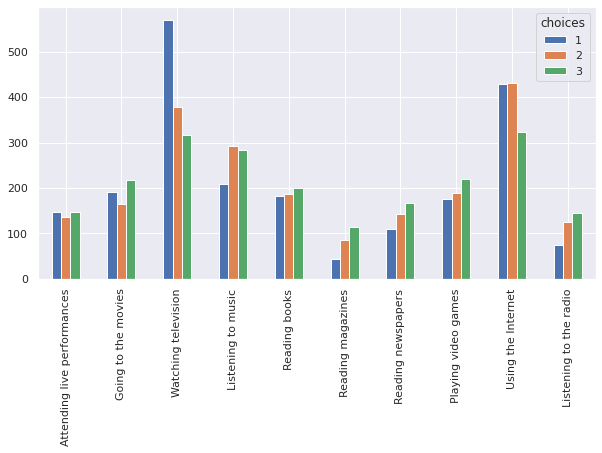

In [220]:
#Since 0 is the same as NA let us remove that from the table above
choices=choices.iloc[1:]
choices=choices.sort_values(by='choices')
choices_transpose=choices.transpose()
choices_transpose.plot.bar(figsize=(10,5))

From the above Visualization, choice 1 being most likely and 3 being least likely, We can see that watching television is the number 1 choice for maximum number of people. Thus, television is the biggest source of entertainment, followed by Internet. The upcoming smart televisions in the market that uses internet might be the reason for the high number of people watching television and using internet.

Keeping this in mind, we decided to delve deeper into the video streaming industry:

In [221]:
df_freq=df_entertain1[df_entertain1.columns[10:21]]
frequency=df_freq['Rent a physical DVD/Blu-ray movie'].value_counts().reset_index().merge(df_freq['Purchase a physical DVD/Blu-ray movie'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Purchase digital video entertainment movie'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Rent digital video entertainment movie'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Watch digital video entertainment movie'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Purchase/rent a video via set-top-box movie'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Rent a physical DVD/Blu-ray tv'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Purchase a physical DVD/Blu-ray tv'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Purchase digital video entertainment tv'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Watch digital video entertainment tv'].value_counts().reset_index(),on='index',how='left')\
     .merge(df_freq['Purchase/rent a video via set-top-box tv'].value_counts().reset_index(),on='index',how='left')
frequency=frequency.rename(columns={'index':'frequency'})
frequency=frequency.set_index('frequency')
frequency

,Rent a physical DVD/Blu-ray movie,Purchase a physical DVD/Blu-ray movie,Purchase digital video entertainment movie,Rent digital video entertainment movie,Watch digital video entertainment movie,Purchase/rent a video via set-top-box movie,Rent a physical DVD/Blu-ray tv,Purchase a physical DVD/Blu-ray tv,Purchase digital video entertainment tv,Watch digital video entertainment tv,Purchase/rent a video via set-top-box tv
frequency,,,,,,,,,,,
Never,772,644,949,977,602,876,942,822,1062,617,992
Occasionally (monthly),579,567,484,472,520,527,467,491,442,499,469
Rarely (one to three times a year),500,667,413,420,218,481,462,560,346,213,419
Frequently (every day/weekly),280,253,285,262,791,247,260,258,281,802,251


We decided to observe the frequency of people buying or renting tv shows or movies in order to understand their purchase activity. As seen in the graph below, people prefer purchasing digital content over renting it. We also see the that the number of people watching movies or tv is very high which is expected. However, we noticed that  while the frequency of people watching the show is high, frequency of people never purchasing a movie or tv show is also high. There are only two possible reasons for the same. Either they are binge watching a single show which makes the watch number appear higher, or they have been piggybacking on someone else’s subscription. It is important to look in this aspect since if too many people are using someone eles subscription, the companies can start monitoring the number of screens on the account to prevent such activities

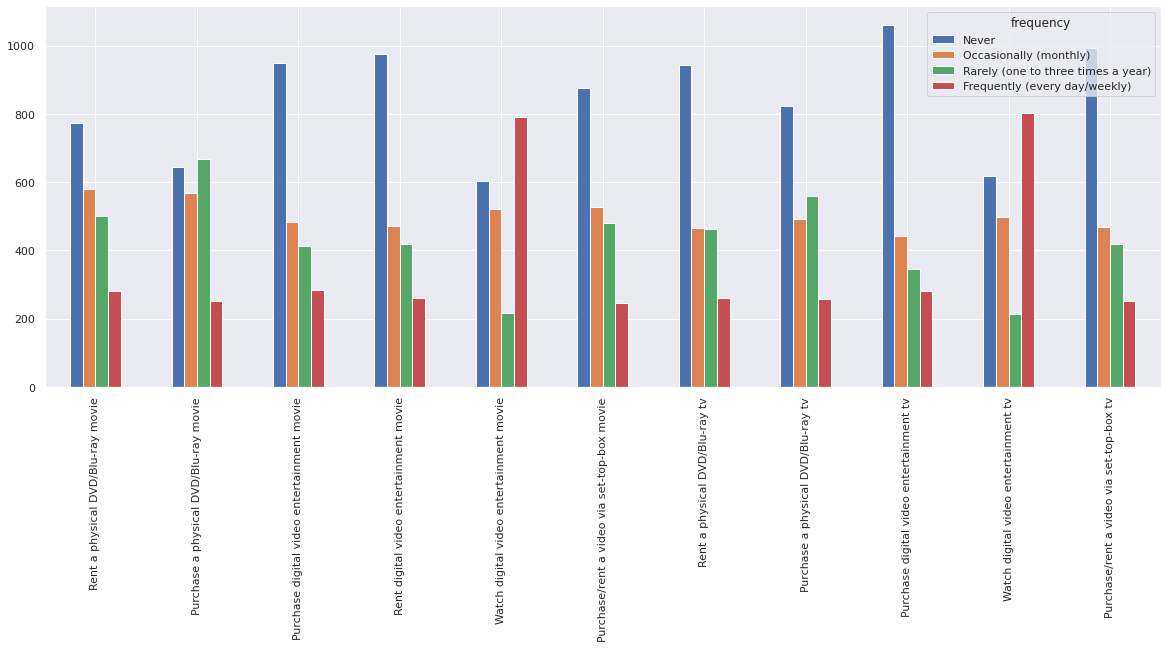

In [222]:
#Plot frequency histogram
frequency_transpose=frequency.transpose()
frequency_transpose.plot.bar(figsize=(20,7))

From the pie chart below we can see that more that double the total users binge watch their tv shows and this might explain the increased watch rate.

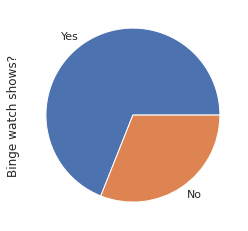

In [223]:
#Binge watch distribution
binge=df_entertain1['Binge watch shows?'].value_counts()
binge.plot.pie(figsize=(7,4))

We also plot another chart to show if people have been using someone else's subscription but as we can see below, majority people do not use anyone else's subscription so this is not a route companies need to worry about.

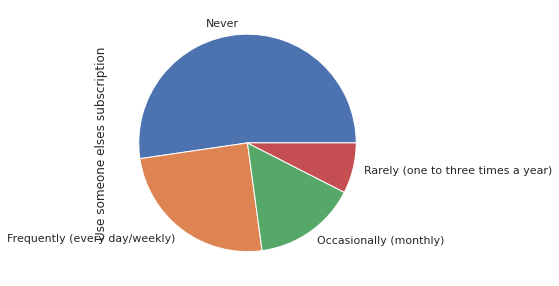

In [224]:
#Piggy back distribution
pb=df_entertain1['Use someone elses subscription'].value_counts()
pb.plot.pie(figsize=(10,5))

Analyzing what device is used to watch movies and sports?

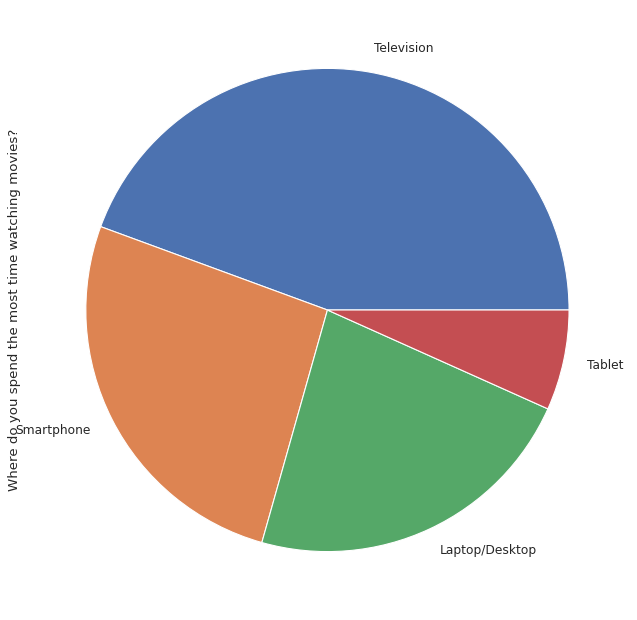

In [225]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
ds1['Where do you spend the most time watching movies?'].value_counts().plot(kind='pie')

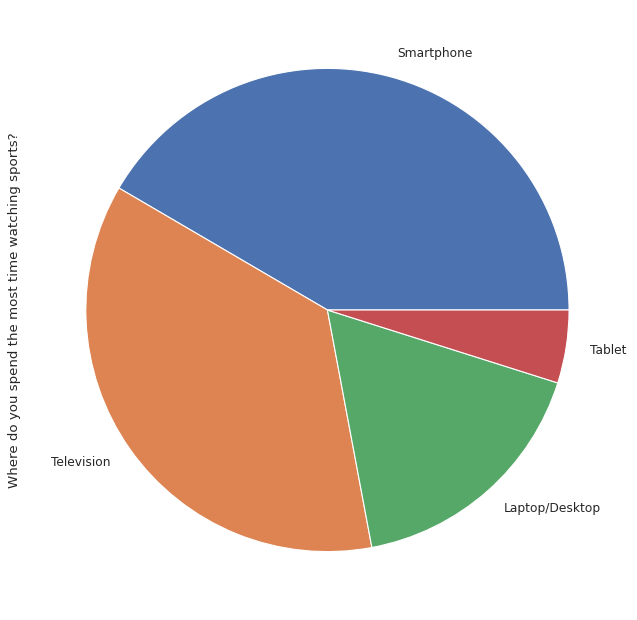

In [226]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
ds2['Where do you spend the most time watching sports?'].value_counts().plot(kind='pie')

From the above two visualizations, you can notice that television and smartphone have an equal share in the pei chart. Thus equal amount of people watch movies and sports on televsion and smartphone. In fact more people watch sports on smartphone than television. Thus it is important in this generation that if any new streaming platform is being launched in the competitve space, they have a very GUI and user friendly interface for their mobile applications along with the normal web interface. This will help them gain more customers who watch movies and sport on their smartphones.
Also as you can see tablets have a very small share in the pie chart. This is because with the launch of new phones with considerable amount of screen size, people are less likely to buy tablets. The tablets market has been on a decline cause of the launch of phones like IPhone Pro series, Samsung Ultra series that have huge screen sizes.


**Analyzing Smartphone Usage**

In [227]:
q22 = pd.DataFrame(columns=['App','Count'])
q22['App'] = [x.split('-')[2] for x in qcols_dict['Q22'][:-2]]
for i in range(q22.shape[0]):
  q22.loc[i,'Count'] = df.loc[df[qcols_dict['Q22'][i]]=='Yes',qcols_dict['Q22'][i]].count()

In [228]:
q22.sort_values(by = 'Count',ascending=False)

,App,Count
6,Social networks,856
26,Browser,679
25,Weather,675
8,Streaming music,588
22,Games,557
1,Banking,543
4,Retail/shopping,520
5,Navigation,492
9,Streaming video,488
29,Messaging,443


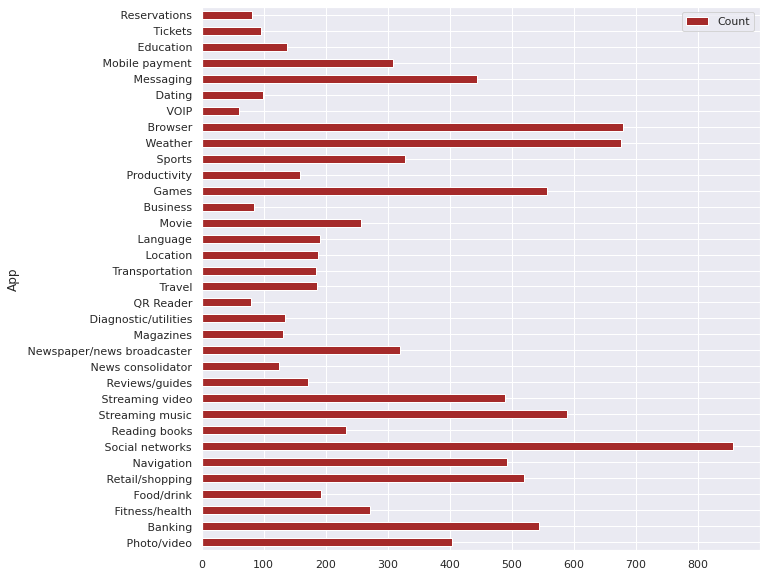

In [229]:
q22.plot.barh(x='App', y='Count', figsize=(10,10), color='brown')

Social Networking apps are the most frequently used apps by users on their smartphones. This could be as a result of a lot of social networking apps launching new features around the same time as the survey's timeline. 2011 was a big year for facebook as the number of users had sky-rocketted Another reason mught be social media townhalls introduced by President Obama. Magazine and New consolidator apps do not seem have been that popular among the users due to fact that a lot of information was available on the internet for free. This could also be one of the reasons that browser was the second mst frequently used app as reported by users.



One of the notable facts financial events that needs to be considered before digging further into the spending choices of the users and other analysis is the fact that 2011 was the year when the world was still recovering from economic recession which had a major role to play in any financial decisions made by the users.

**Analyzing Household Purchases**

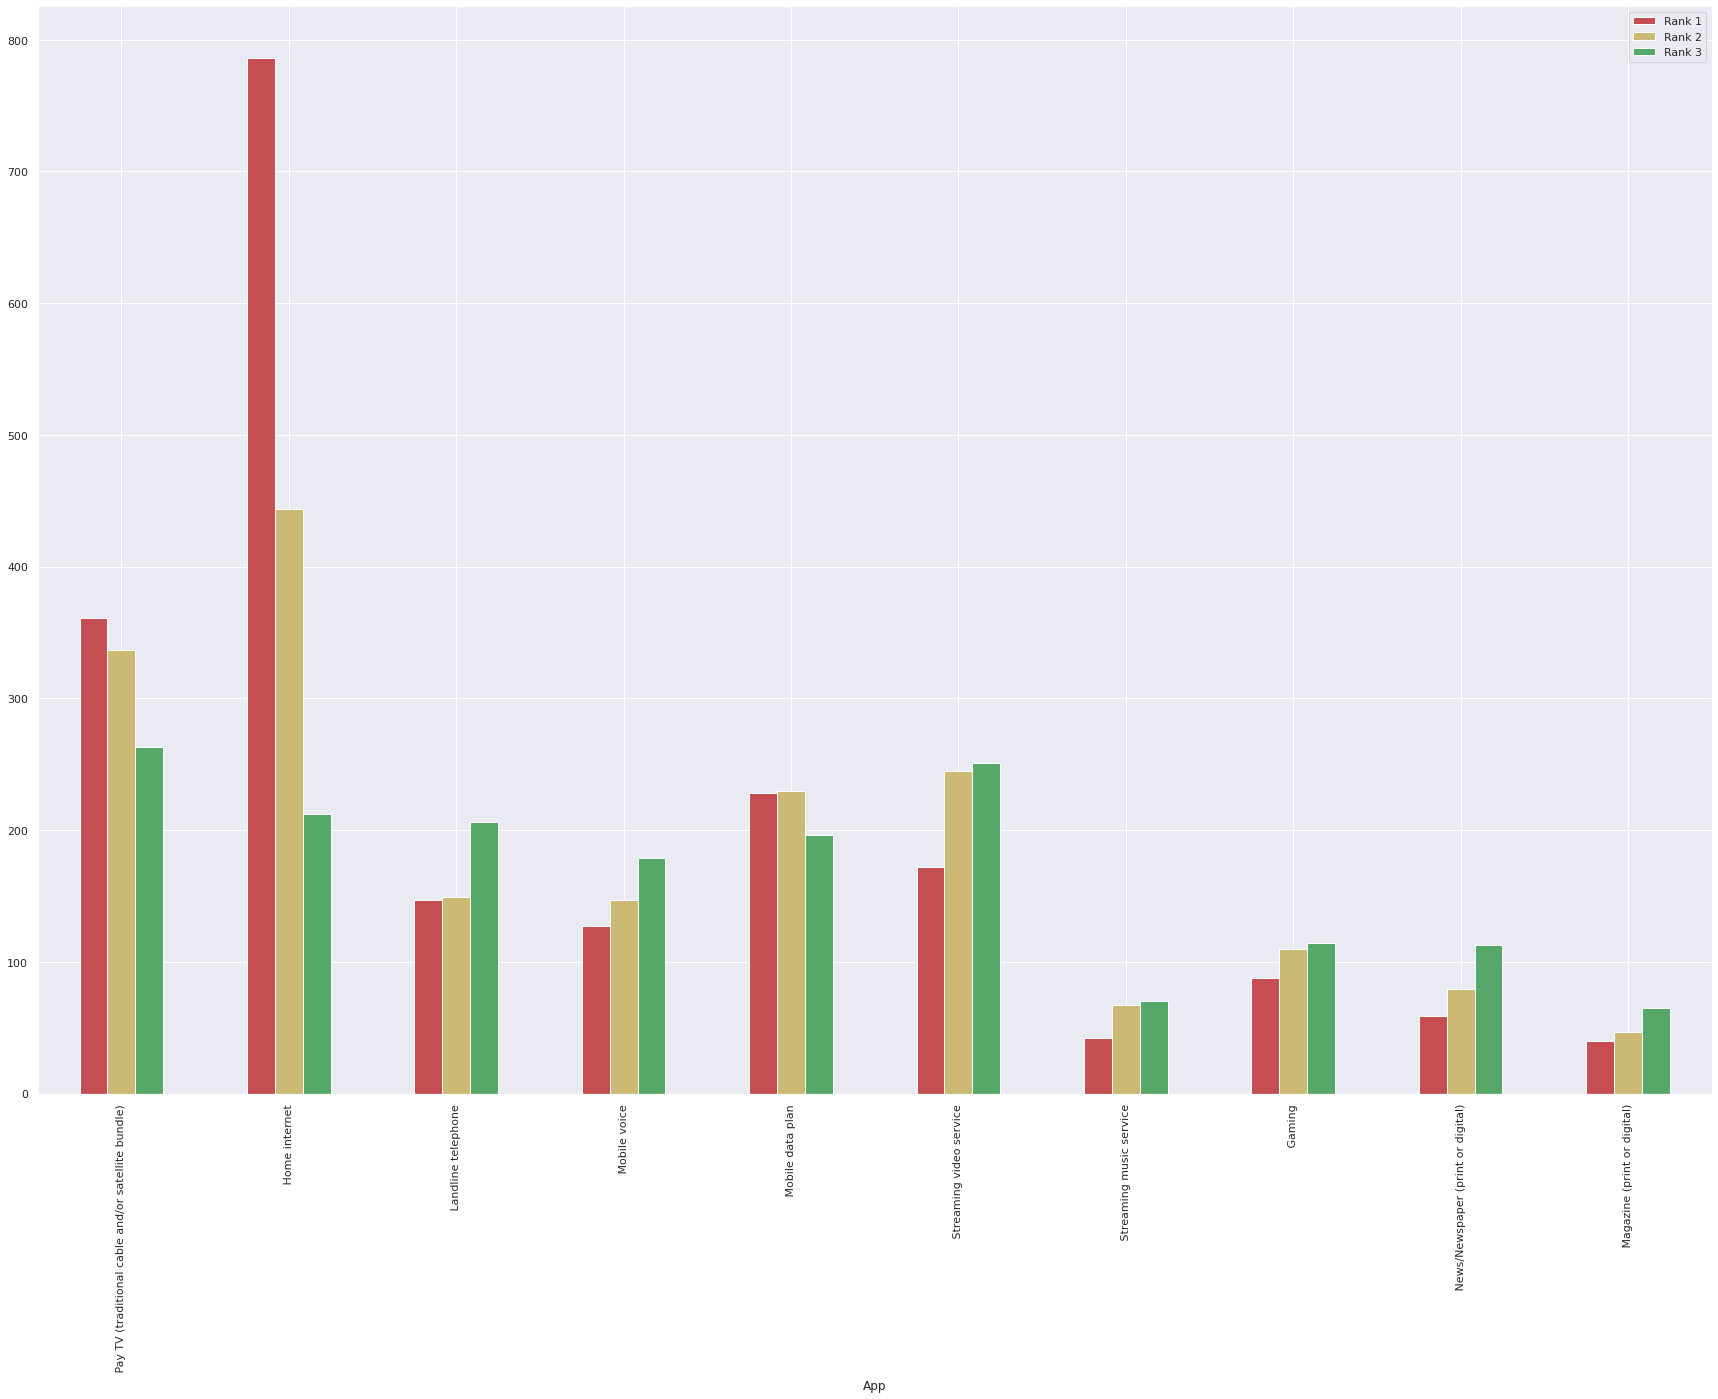

In [230]:
q36 = pd.DataFrame(columns=['App','Not preferred','Rank 1','Rank 2','Rank 3'])
q36['App'] = [x.split('-')[2] for x in qcols_dict['Q36']]
for i in range(q36.shape[0]):
  q36.loc[i,'Not preferred'] = df.loc[df[qcols_dict['Q36'][i]]==0,qcols_dict['Q36'][i]].count()
  q36.loc[i,'Rank 1'] = df.loc[df[qcols_dict['Q36'][i]]==1,qcols_dict['Q36'][i]].count()
  q36.loc[i,'Rank 2'] = df.loc[df[qcols_dict['Q36'][i]]==2,qcols_dict['Q36'][i]].count()
  q36.loc[i,'Rank 3'] = df.loc[df[qcols_dict['Q36'][i]]==3,qcols_dict['Q36'][i]].count()

q36.plot.bar(x='App',y=['Rank 1','Rank 2','Rank 3'], color=['r','y','g'])

We  can see that most of the users chose to spend on home internet. This is understandable due to the fact that with the advent of technology it was essential for users to be connected to have access to internet inorder to stay updated regarding any events happening around the world.

**Spending Choices - Ads**

In [231]:
q39 = pd.DataFrame(columns=['Pref','Agree strongly','Agree somewhat','Disagree somewhat','Disagree strongly', 'Agree', 'Disagree'])
q39['Pref'] = ['Pay for news, no ads',
 'Pay for sports',
 'Pay for games',
 'Pay for music',
 'Pay for TV shows',
 'Pay for movies',
 'More personal info - targeted ads',
 'No personal info - victim of identity theft','View Ads at reduced cost of subscription']
for i in range(q39.shape[0]):
  q39.loc[i,'Agree strongly'] = df.loc[df[qcols_dict['Q39'][i]]=='Agree strongly',qcols_dict['Q39'][i]].count()
  q39.loc[i,'Agree somewhat'] = df.loc[df[qcols_dict['Q39'][i]]=='Agree somewhat',qcols_dict['Q39'][i]].count()
  q39.loc[i,'Disagree somewhat'] = df.loc[df[qcols_dict['Q39'][i]]=='Disagree somewhat',qcols_dict['Q39'][i]].count()
  q39.loc[i,'Disagree strongly'] = df.loc[df[qcols_dict['Q39'][i]]=='Disagree strongly',qcols_dict['Q39'][i]].count()
  q39.loc[i,'Agree'] = q39.loc[i,'Agree strongly'] + q39.loc[i,'Agree somewhat']
  q39.loc[i,'Disagree'] = q39.loc[i,'Disagree strongly'] + q39.loc[i,'Disagree somewhat']

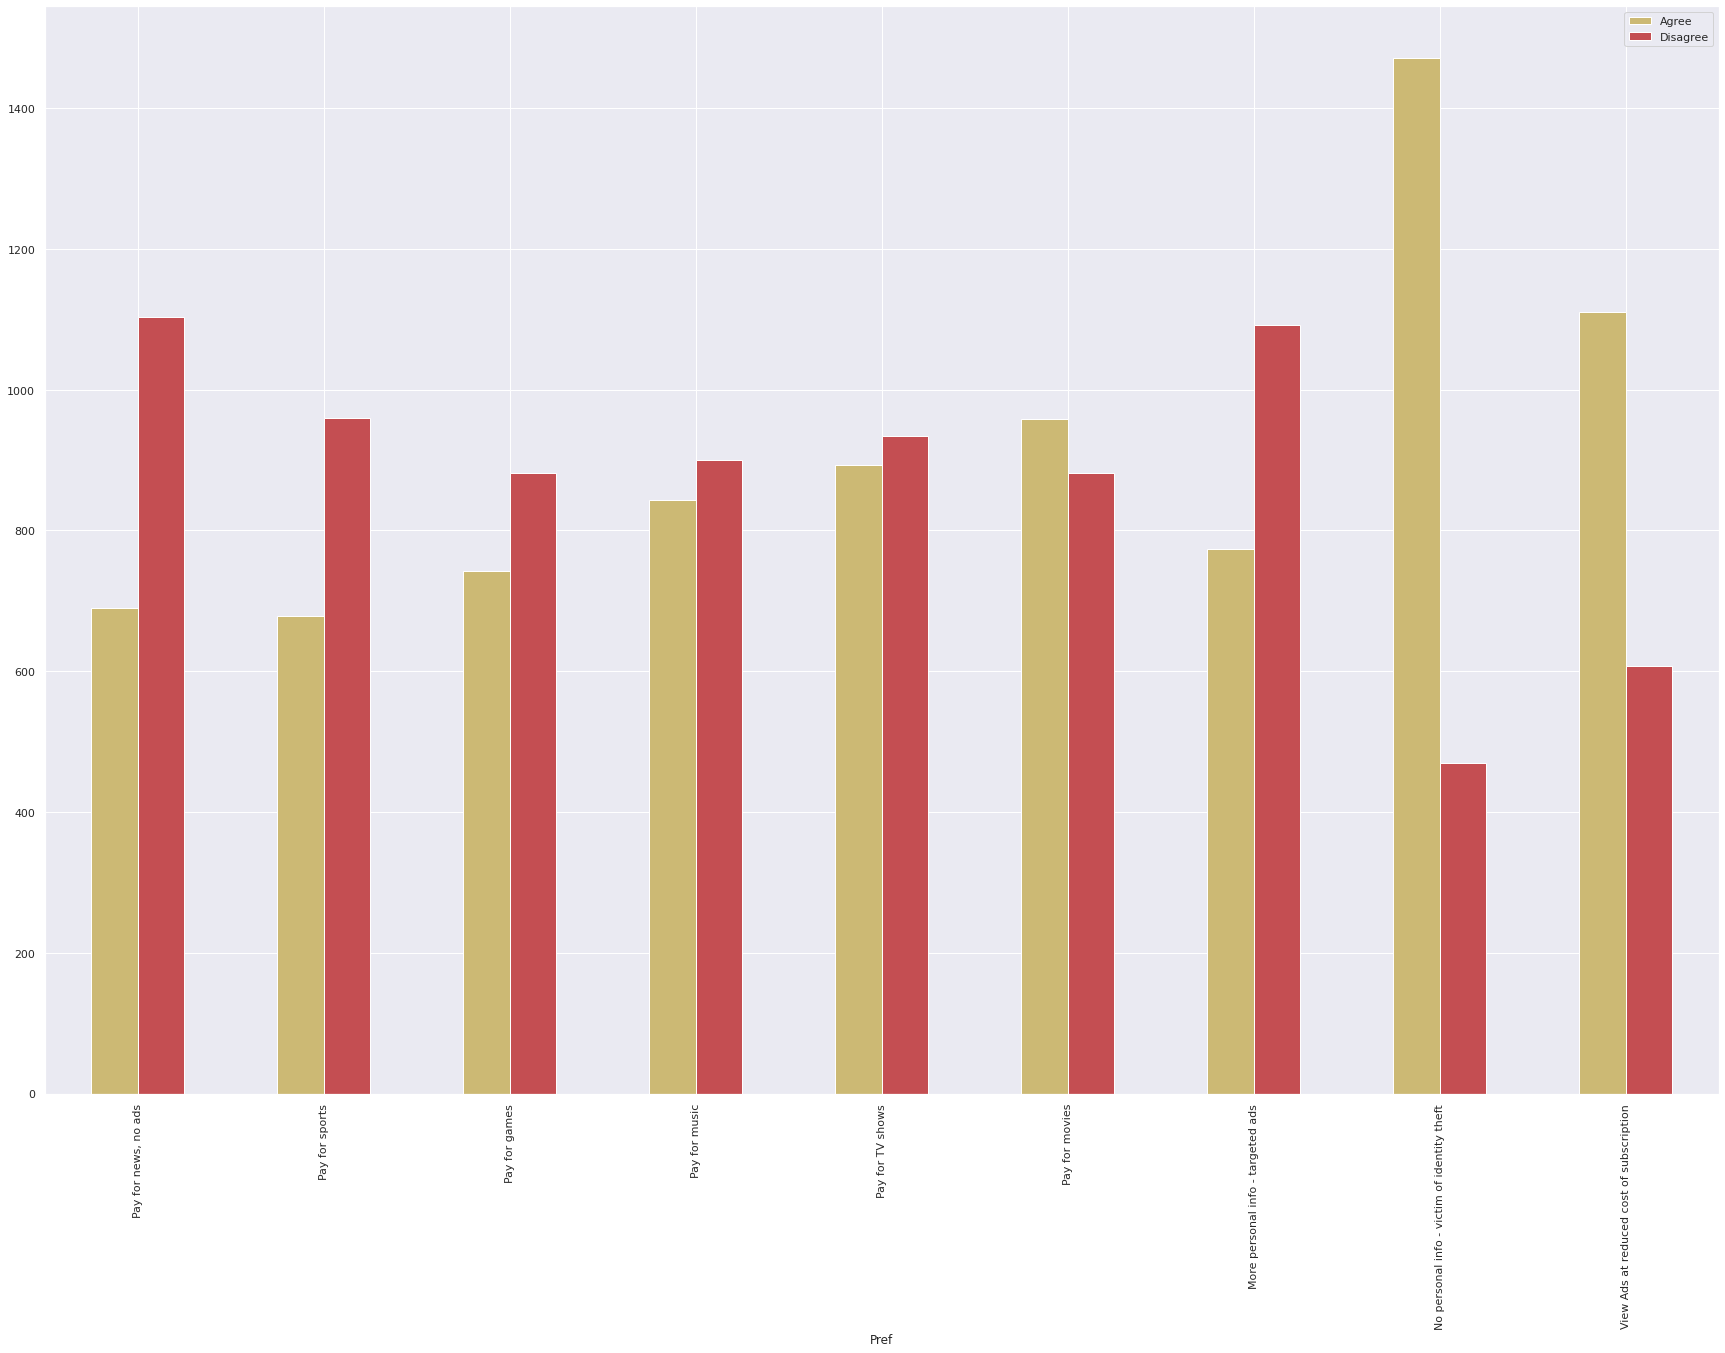

In [232]:
q39.plot.bar(x='Pref',y=['Agree','Disagree'], color=['y','r'])

Most users are unwilling to share personal information. The ones who are willing to would only do it for getting targeted ads or if subscription was offered at a reduced price

**Spending Choices - Higher Download Speeds**

In [233]:
a = df.loc[df['Q29 - Pay for double download speed']=='I am willing to pay $20 per month on top of what I already pay','Q29 - Pay for double download speed'].count()
b = df.loc[df['Q29 - Pay for double download speed']=='I am willing to pay $5 per month on top of what I already pay','Q29 - Pay for double download speed'].count()
c = df.loc[df['Q29 - Pay for double download speed']=='I am willing to pay $10 per month on top of what I already pay','Q29 - Pay for double download speed'].count()
d = df.loc[df['Q29 - Pay for double download speed']=='I prefer faster speed but I am unwilling to pay more than I already do','Q29 - Pay for double download speed'].count()
e = df.loc[df['Q29 - Pay for double download speed']=='I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs','Q29 - Pay for double download speed'].count()
f = df.loc[df['Q29 - Pay for double download speed']=='I am willing to pay $30 or more per month on top of what I already pay','Q29 - Pay for double download speed'].count()

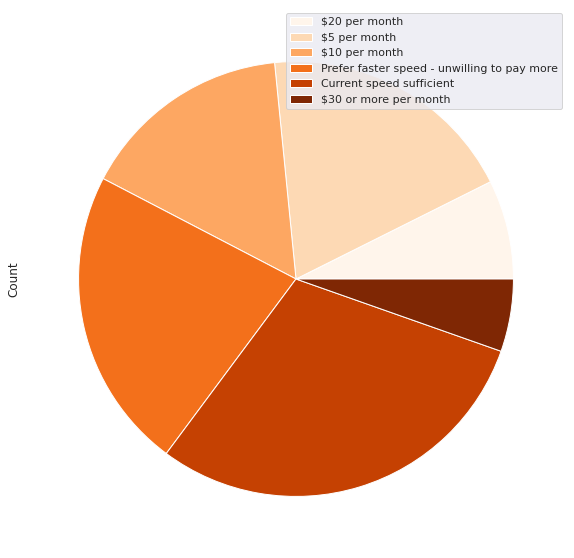

In [234]:
q29 = pd.DataFrame({'Count':[a,b,c,d,e,f]}, index = ['$20 per month',
       '$5 per month',
       '$10 per month',
       'Prefer faster speed - unwilling to pay more',
       'Current speed sufficient',
       '$30 or more per month'])
q29.plot.pie(y='Count',figsize=(10, 10),wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, cmap='Oranges', labels=None)

Most users are content with the existing speeds. This could be because For most of the major broadband providers may have been providing actual download speeds that were 100% of advertised speeds or better. 


**Further analysis of spending choices based on demographics**

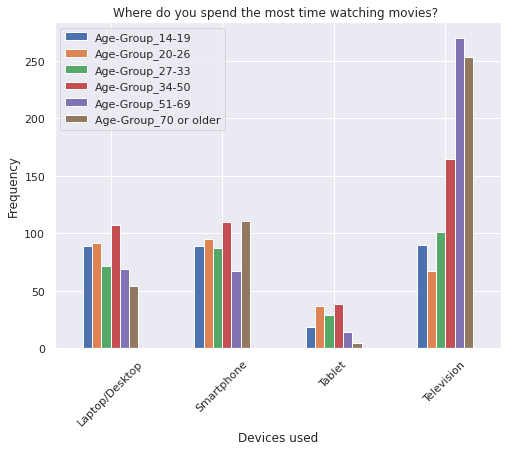

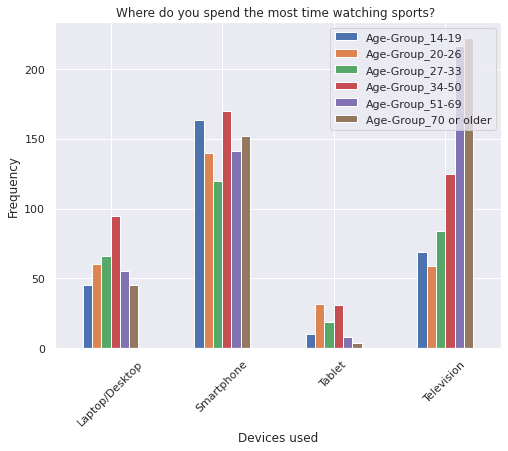

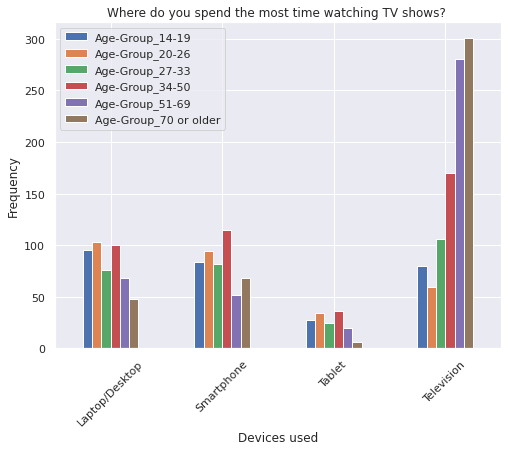

In [235]:
df_age = pd.get_dummies(df_demo, columns=['Age-Group'])
df_graph1 = df_age.iloc[:, 7:]

df_graph1['target'] = ds1['Where do you spend the most time watching movies?']
df_graph1.head()
df_plot = df_graph1.groupby('target').sum()
df_plot.plot.bar(title = 'Where do you spend the most time watching movies? ', figsize = (8,6), grid = True)
plt.xlabel('Devices used')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

df_graph1['target'] = ds2['Where do you spend the most time watching sports?']
df_graph1.head()
df_plot = df_graph1.groupby('target').sum()
df_plot.plot.bar(title = 'Where do you spend the most time watching sports? ', figsize = (8,6), grid = True)
plt.xlabel('Devices used')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

df_graph1['target'] = ds3['Where do you spend the most time watching TV shows?']
df_graph1.head()
df_plot = df_graph1.groupby('target').sum()
df_plot.plot.bar(title = 'Where do you spend the most time watching TV shows? ', figsize = (8,6), grid = True)
plt.xlabel('Devices used')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

From the visualizations, you can notice that elderly people tend to use television mainly to watch TV shows, sports and movies. The younger and middle age group tend to use smartphones to watch sports. Age group 34-50 , the working class mainly uses laptop/desktop which makes sense cause they are usually using their work lapotops and then tend to use that for watching movies/sports/TVshows as well. The number of elderly people using tablets is also very less casue tablets is a more recent thing and elderly population are not very familair with it.

## **Clustering for Customer Segmentation**

In order to cluster the dataset we need to have numerical values. Hence we would be converting all categorical values to numerical values. For this we would use both label encoding and one hot encoding. Label encoding has been used for terms like yes, no, agree, agree somewhat etc type of columns where a positive output like agree would be given 1, 2 while negative words like disagree or disagree strongly would be given -1, -2. We did not perform one hot on these columns since we wanted to assign different weights for different connotations. 

In [236]:
df.replace({'Yes':1, 'No':0, 'Agree somewhat':1, 'Agree strongly': 1, 'Disagree somewhat': -1, 'Disagree strongly':-1, 'N/A; I do not have a basis to answer':0, 
            'Always (close to 100% of the time)':1, 'Almost always (greater than 75% of the time)':0.75, 'Frequently (between 50% and 75% of the time)':0.5,
            'Rarely (10%-50% of the time)':0.25,'Almost never':0, 'Frequently (every day/weekly)':3,'Occasionally (monthly)':2,'Rarely (one to three times a year)':1,'Never':0},inplace=True)
df.fillna(0, inplace=True)

In [237]:
dffinal = pd.get_dummies(df, drop_first= True)

We then normalize the datasets since kmeans is sensitive to varying datasets and not normalizing would affect our final results

In [238]:
df_sample=dffinal.copy()
from sklearn.preprocessing import normalize
dffinal_normal = normalize(dffinal)
dffinal_normal = pd.DataFrame(dffinal, columns=df_sample.columns)
dffinal_normal.head()

,Q8 - Home Entertainment - Flat panel television,Q8 - Home Entertainment - Digital video recorder (DVR),Q8 - Home Entertainment - Streaming media box or over-the-top box,Q8 - Home Entertainment - Portable streaming thumb drive/fob,Q8 - Home Entertainment - Which of the following media or home entertainment equipment does your household own?,Q8 - Home Entertainment - Blu-ray disc player/DVD player,Q8 - Home Entertainment - Gaming console,Q8 - Home Entertainment - Portable video game player,Q8 - Home Entertainment - Computer network/router in your home for wireless computer/laptop usage,Q8 - Home Entertainment - Desktop computer,...,QNEW29 - Borrowed Subscription: Content_Television programming,Q89 - Frequent News Mechanism_Magazine,Q89 - Frequent News Mechanism_News aggregators,Q89 - Frequent News Mechanism_Online news sites not associated with a traditional news organization,Q89 - Frequent News Mechanism_Online version of newspapers,Q89 - Frequent News Mechanism_Print newspapers,Q89 - Frequent News Mechanism_Radio,Q89 - Frequent News Mechanism_Social media sites,Q89 - Frequent News Mechanism_Television news stations,Q89 - Frequent News Mechanism_Variety/talk shows
0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


We now perform kmeans clustering in order to categorize users based on their activity. We would be using 10 clusters for this task

[2 3 2 ... 5 1 2]


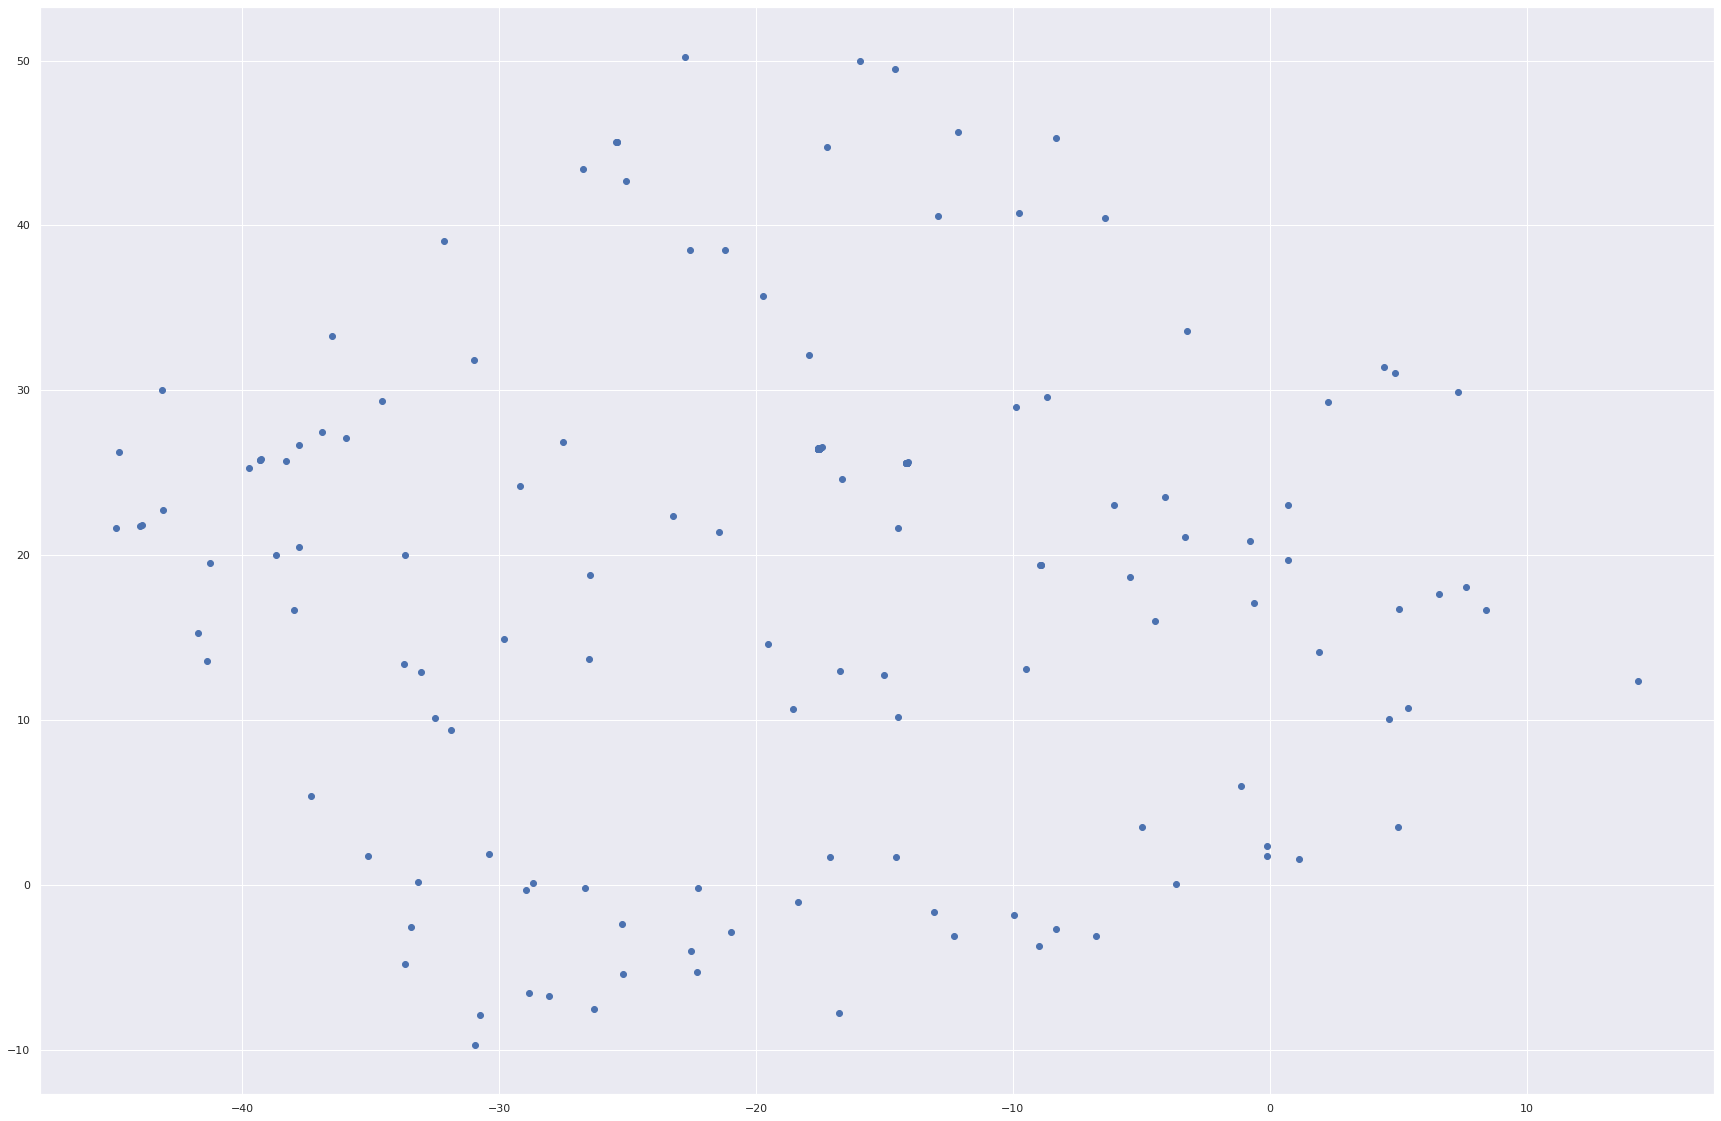

In [239]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
pca = PCA(2)
 
#Transform the data
df11 = pca.fit_transform(dffinal_normal)
 
df11.shape

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df11)
 
print(label)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df11[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

We now plot the clusters on all features using a scatterplot to understand the split and view their centroids

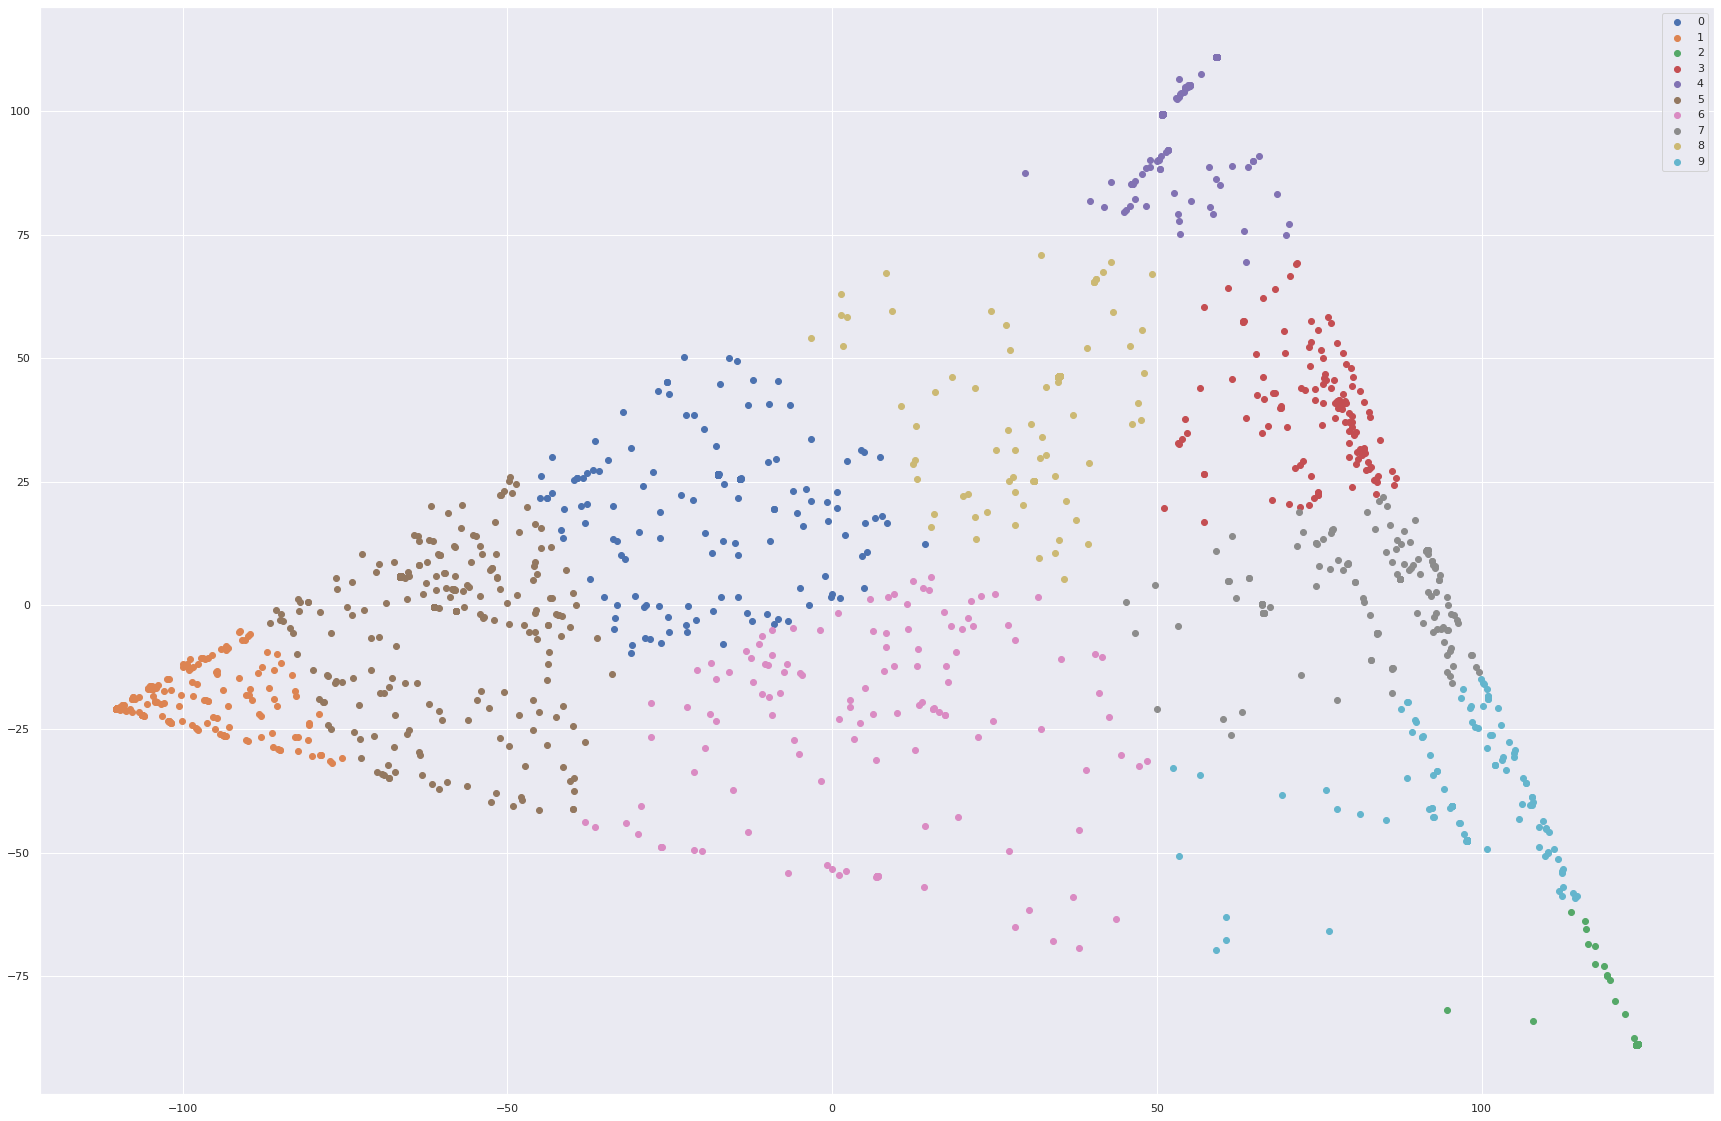

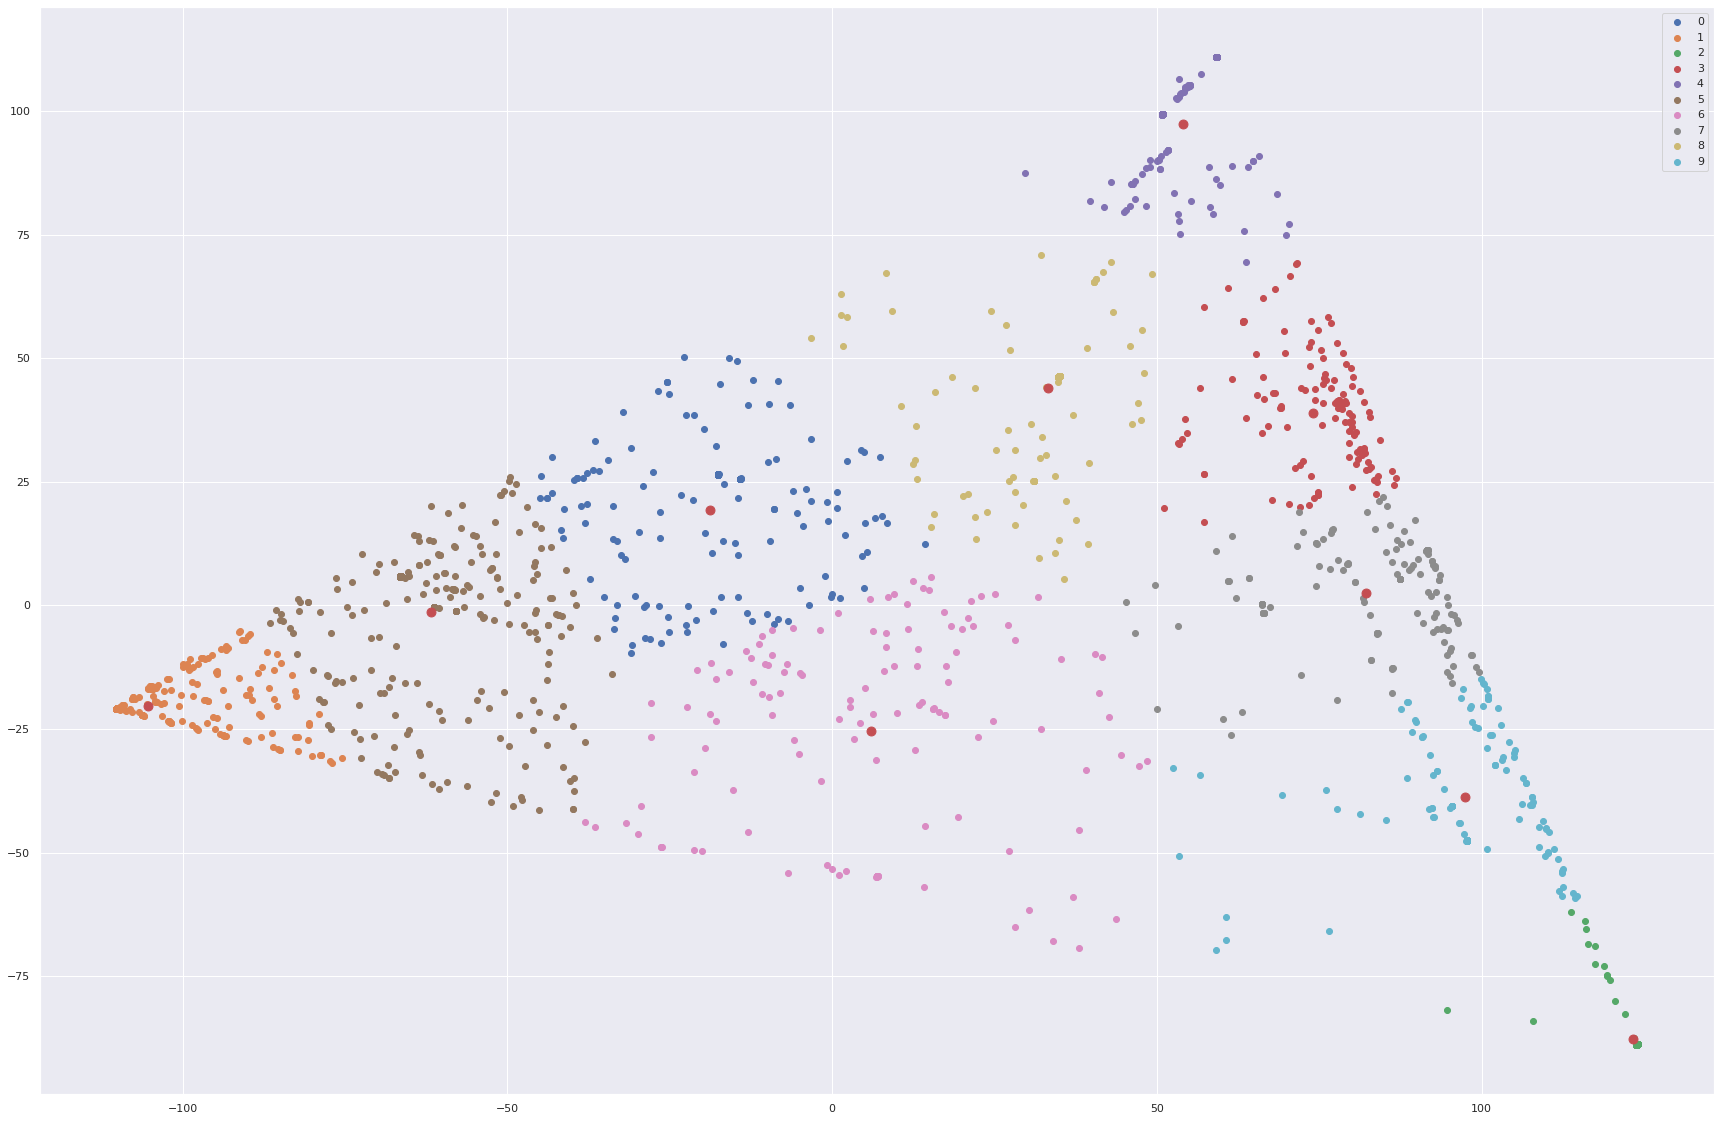

In [240]:
#Getting unique labels
import matplotlib.pyplot as plt
import numpy as np

u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df11[label == i , 0] , df11[label == i , 1] , label = i)
plt.legend()
plt.show()

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

for i in u_labels:
  plt.scatter(df11[label == i , 0] , df11[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'r')
plt.legend()
plt.show()

We added the predicted cluster label to our main dataset in order to observe activities of users is each cluster. Post this we roll up all the contents in the dataset on each cluster to get a summarized view.

In [241]:
#Add the prediction clusters to our main dataset 
dffinal['predictions'] = label
dffinal['check']=1
dffinal.head()

,Q8 - Home Entertainment - Flat panel television,Q8 - Home Entertainment - Digital video recorder (DVR),Q8 - Home Entertainment - Streaming media box or over-the-top box,Q8 - Home Entertainment - Portable streaming thumb drive/fob,Q8 - Home Entertainment - Which of the following media or home entertainment equipment does your household own?,Q8 - Home Entertainment - Blu-ray disc player/DVD player,Q8 - Home Entertainment - Gaming console,Q8 - Home Entertainment - Portable video game player,Q8 - Home Entertainment - Computer network/router in your home for wireless computer/laptop usage,Q8 - Home Entertainment - Desktop computer,...,Q89 - Frequent News Mechanism_News aggregators,Q89 - Frequent News Mechanism_Online news sites not associated with a traditional news organization,Q89 - Frequent News Mechanism_Online version of newspapers,Q89 - Frequent News Mechanism_Print newspapers,Q89 - Frequent News Mechanism_Radio,Q89 - Frequent News Mechanism_Social media sites,Q89 - Frequent News Mechanism_Television news stations,Q89 - Frequent News Mechanism_Variety/talk shows,predictions,check
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,3,1
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,2,1
3,1,1,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,5,1
4,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1


In [242]:
dffinal2 = dffinal.astype(float)
cluster_groups=dffinal.groupby('predictions').sum()
cluster_groups=cluster_groups.drop(columns='check')

Since we have so many columns, plotting it on a line would give a better idea about which points are drastically different from each other.

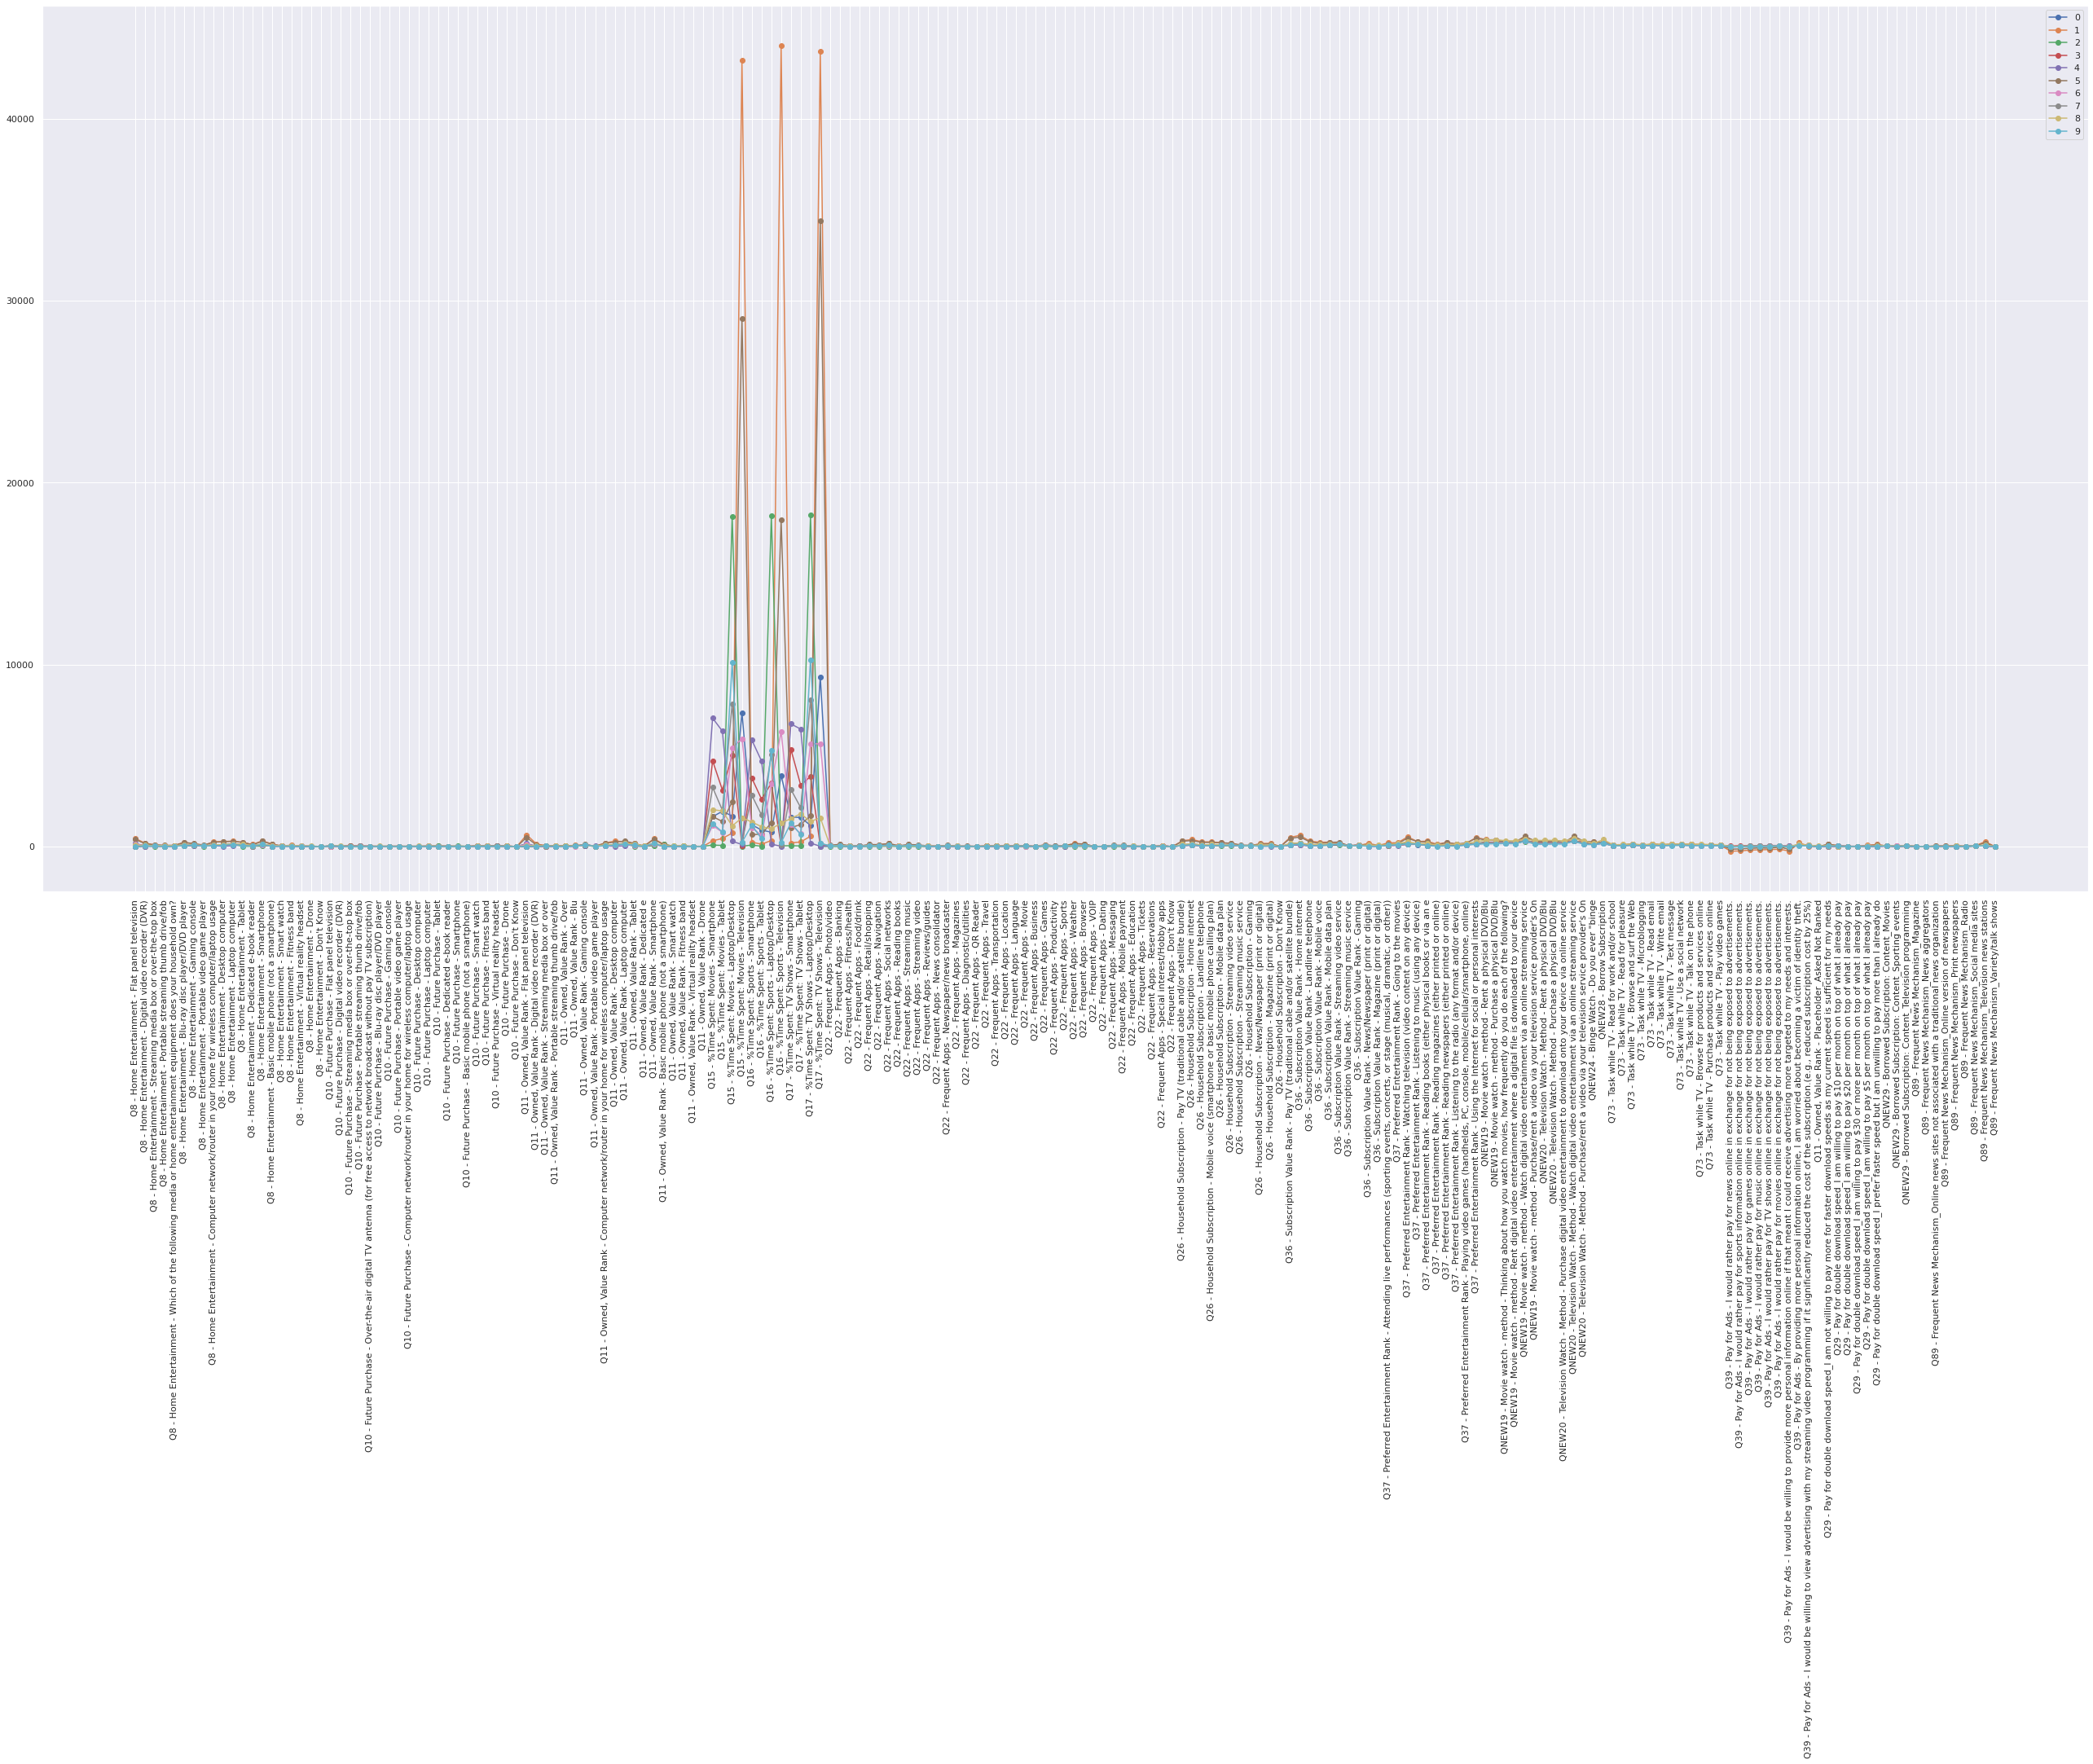

In [243]:
#Plot line
y=[]
x=[]
plt.figure(figsize=(45, 20))
for i in cluster_groups.index:
    for j in cluster_groups.columns:
        y.append(cluster_groups.loc[i,j])
        x.append(j)
    plt.plot(x,y, label=i,marker="o")
    y = []
    x = []
plt.xticks(rotation=90)
plt.legend()
plt.show()

On viewing the line plot we can see that there is a vast difference in the time spent by users on different devices.<br><br>
***Ad revenue:*** To get an idea about the where a company can generate more ad revenue, we can focus on this difference of the line plot. There is a major separation among people in terms of the devices they use while watching sports, movies and tv shows. Observing cluster 1 closely we can see that these people spend the most amount of time watching movies on the television and watching tv shows on their smartphones. Thus if we want to publish an advertisement on smartphones we should focus on what the most popular tv shows are as that would help us target the audience in cluster 1 who prefer smartphones. Similarly if we want to use television as a medium for advertisements, it would be a good option to look up popular movies that people like to watch


# **Classification using Logistic Regression for building Market Strategy**

We will carry out Logistic Regression over 3 target variables with our demographic data:
1. I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests
2. I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.
3. Are you willing to pay to receive double your download speed

In [244]:
#For our first variable
dfads=dffinal_normal
dfads.rename(columns={'Q39 - Pay for Ads - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests.': 'Provide_personal_info_for_targeted_ads'}, inplace=True)

In [245]:
#For our analysis, we don't need State as we have region and we don't need Economic Class as we have Income group

df_demo.drop('State',axis=1,inplace=True)
df_demo.drop('Economic Class System',axis=1,inplace=True)
df_demo.head()

,Gender,Age-Group,Region,Employment-Status,Ethnicity,Children in Home,Annual Household Income
0,Male,34-50,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"
1,Female,20-26,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"
2,Female,27-33,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999"
3,Female,20-26,West,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,"Less than $29,999"
4,Male,27-33,Midwest,Student,White or Caucasian (Non-Hispanic),Yes,"$50,000 to $99,999"


In [246]:
#replace few of the feature values
df_demo.Gender = df_demo.Gender.replace({'Female': 0, 'Male': 1}).astype(int)
df_demo['Children in Home'] = df_demo['Children in Home'].replace({'No': 0, 'Yes': 1}).astype(int)

In [247]:
#one hot encoding to convert into numerical data
df_dummies=pd.get_dummies(df_demo)
df_dummies.head()

,Gender,Children in Home,Age-Group_14-19,Age-Group_20-26,Age-Group_27-33,Age-Group_34-50,Age-Group_51-69,Age-Group_70 or older,Region_Midwest,Region_Northeast,...,"Ethnicity_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Ethnicity_Something else not listed here,"Ethnicity_South Asian (India, Pakistan, Sri Lanka)",Ethnicity_White or Caucasian (Non-Hispanic),"Annual Household Income_$100,000 to $299,999","Annual Household Income_$30,000 to $49,999","Annual Household Income_$50,000 to $99,999",Annual Household Income_Do not know,"Annual Household Income_Less than $29,999","Annual Household Income_More than $300,000"
0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [248]:
df_reg1=df_dummies.copy()
df_reg1['Provide_personal_info_for_targeted_ads']=dfads.Provide_personal_info_for_targeted_ads


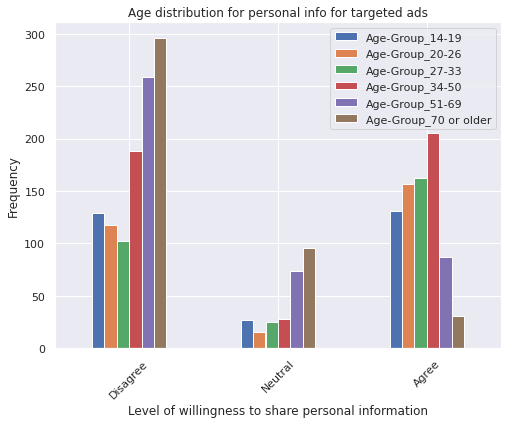

In [249]:
#Age distribution for personal info for targeted ads
df_plot = df_reg1[['Provide_personal_info_for_targeted_ads','Age-Group_14-19','Age-Group_20-26','Age-Group_27-33','Age-Group_34-50','Age-Group_51-69','Age-Group_70 or older']].groupby('Provide_personal_info_for_targeted_ads').sum()
df_plot.plot.bar(title = 'Age distribution for personal info for targeted ads', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to share personal information')
plt.ylabel('Frequency')
positions=(0,1,2)
labels=('Disagree','Neutral','Agree')

plt.xticks(positions, labels)
plt.xticks(rotation = 45)
plt.show()

Based on the graph above, we can say that older people refuse to provide personal information for targeted ads whereas the younger working class are willing to provide personal information to view targeted ads. 

Because younger people are more willing to view ads, they are okay with providing personal information to view targeted ads.


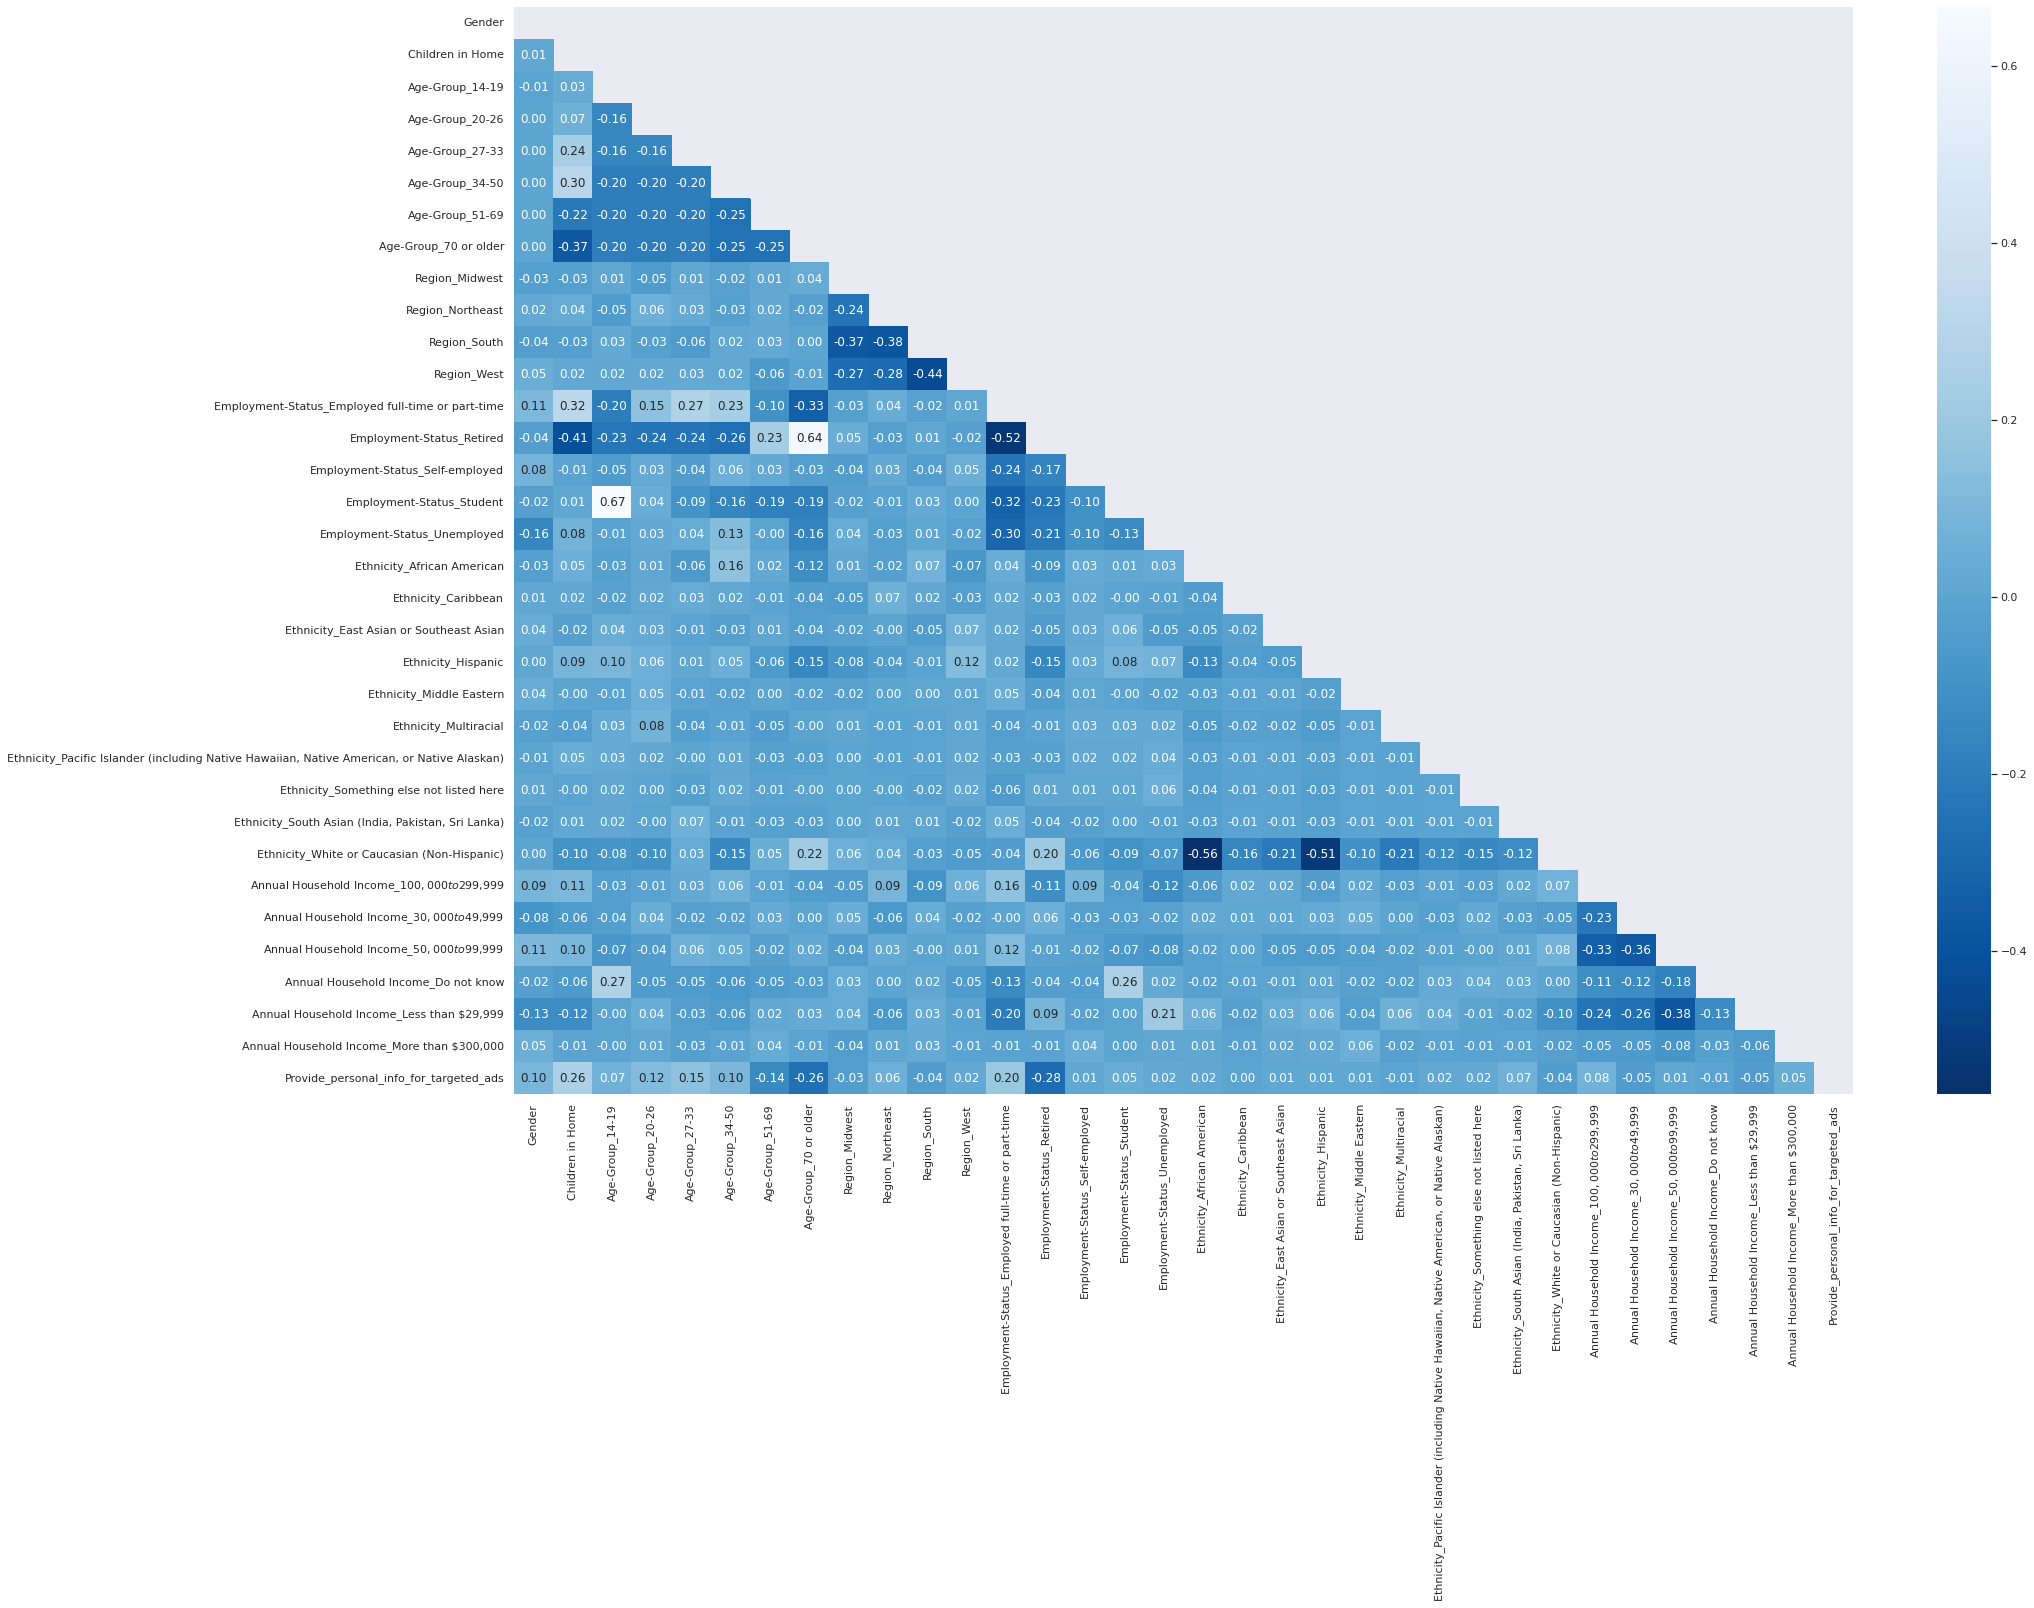

In [250]:
#checking to see if there are any highly correlated values
import seaborn as sns
import numpy as np
sns.set(rc = {'figure.figsize':(30,20)})
mask = np.triu(np.ones_like(df_reg1.corr()))
sns.heatmap(df_reg1.corr(), annot=True,fmt="0.2f",cmap = 'Blues_r',mask=mask)
plt.show()

In [251]:
from sklearn.model_selection import train_test_split
X=df_reg1.loc[:, df_reg1.columns != 'Provide_personal_info_for_targeted_ads']
Y=df_reg1['Provide_personal_info_for_targeted_ads']
X.head()

,Gender,Children in Home,Age-Group_14-19,Age-Group_20-26,Age-Group_27-33,Age-Group_34-50,Age-Group_51-69,Age-Group_70 or older,Region_Midwest,Region_Northeast,...,"Ethnicity_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Ethnicity_Something else not listed here,"Ethnicity_South Asian (India, Pakistan, Sri Lanka)",Ethnicity_White or Caucasian (Non-Hispanic),"Annual Household Income_$100,000 to $299,999","Annual Household Income_$30,000 to $49,999","Annual Household Income_$50,000 to $99,999",Annual Household Income_Do not know,"Annual Household Income_Less than $29,999","Annual Household Income_More than $300,000"
0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [252]:
#training-75%, testing-25%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [253]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2', solver = 'sag',multi_class='multinomial',)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [254]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.73      0.65       262
           0       0.00      0.00      0.00        62
           1       0.62      0.62      0.62       209

    accuracy                           0.60       533
   macro avg       0.41      0.45      0.43       533
weighted avg       0.54      0.60      0.57       533



We get a 60% accuracy for our target variable Provide_personal_info_for_targeted_ads

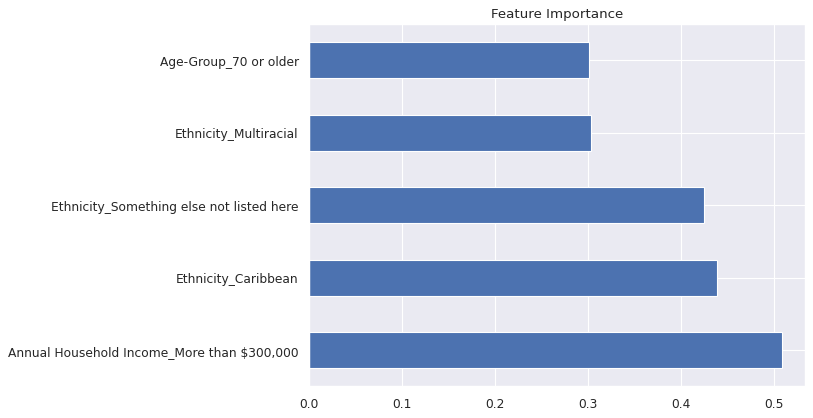

In [255]:
#Getting the top 5 features from the model
importance = logreg.coef_[0]
feat_importances = pd.Series(importance,index = X_test.columns)
feat_importances=abs(feat_importances)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
feat_importances.nlargest(5).plot(kind='barh',title = 'Feature Importance');

As we can see, Age, Ethnicity and Annual Income play an important role in determining our target variable

In [256]:
#Regression for our second target variable
dfreducecost=dffinal_normal
dfreducecost.rename(columns={'Q39 - Pay for Ads - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%)': 'View_advertisement_for_reduced_cost'}, inplace=True)


In [257]:
df_reg2=df_dummies.copy()
df_reg2['View_advertisement_for_reduced_cost']=dfreducecost.View_advertisement_for_reduced_cost
df_reg2.head()

,Gender,Children in Home,Age-Group_14-19,Age-Group_20-26,Age-Group_27-33,Age-Group_34-50,Age-Group_51-69,Age-Group_70 or older,Region_Midwest,Region_Northeast,...,Ethnicity_Something else not listed here,"Ethnicity_South Asian (India, Pakistan, Sri Lanka)",Ethnicity_White or Caucasian (Non-Hispanic),"Annual Household Income_$100,000 to $299,999","Annual Household Income_$30,000 to $49,999","Annual Household Income_$50,000 to $99,999",Annual Household Income_Do not know,"Annual Household Income_Less than $29,999","Annual Household Income_More than $300,000",View_advertisement_for_reduced_cost
0,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,-1
2,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,-1


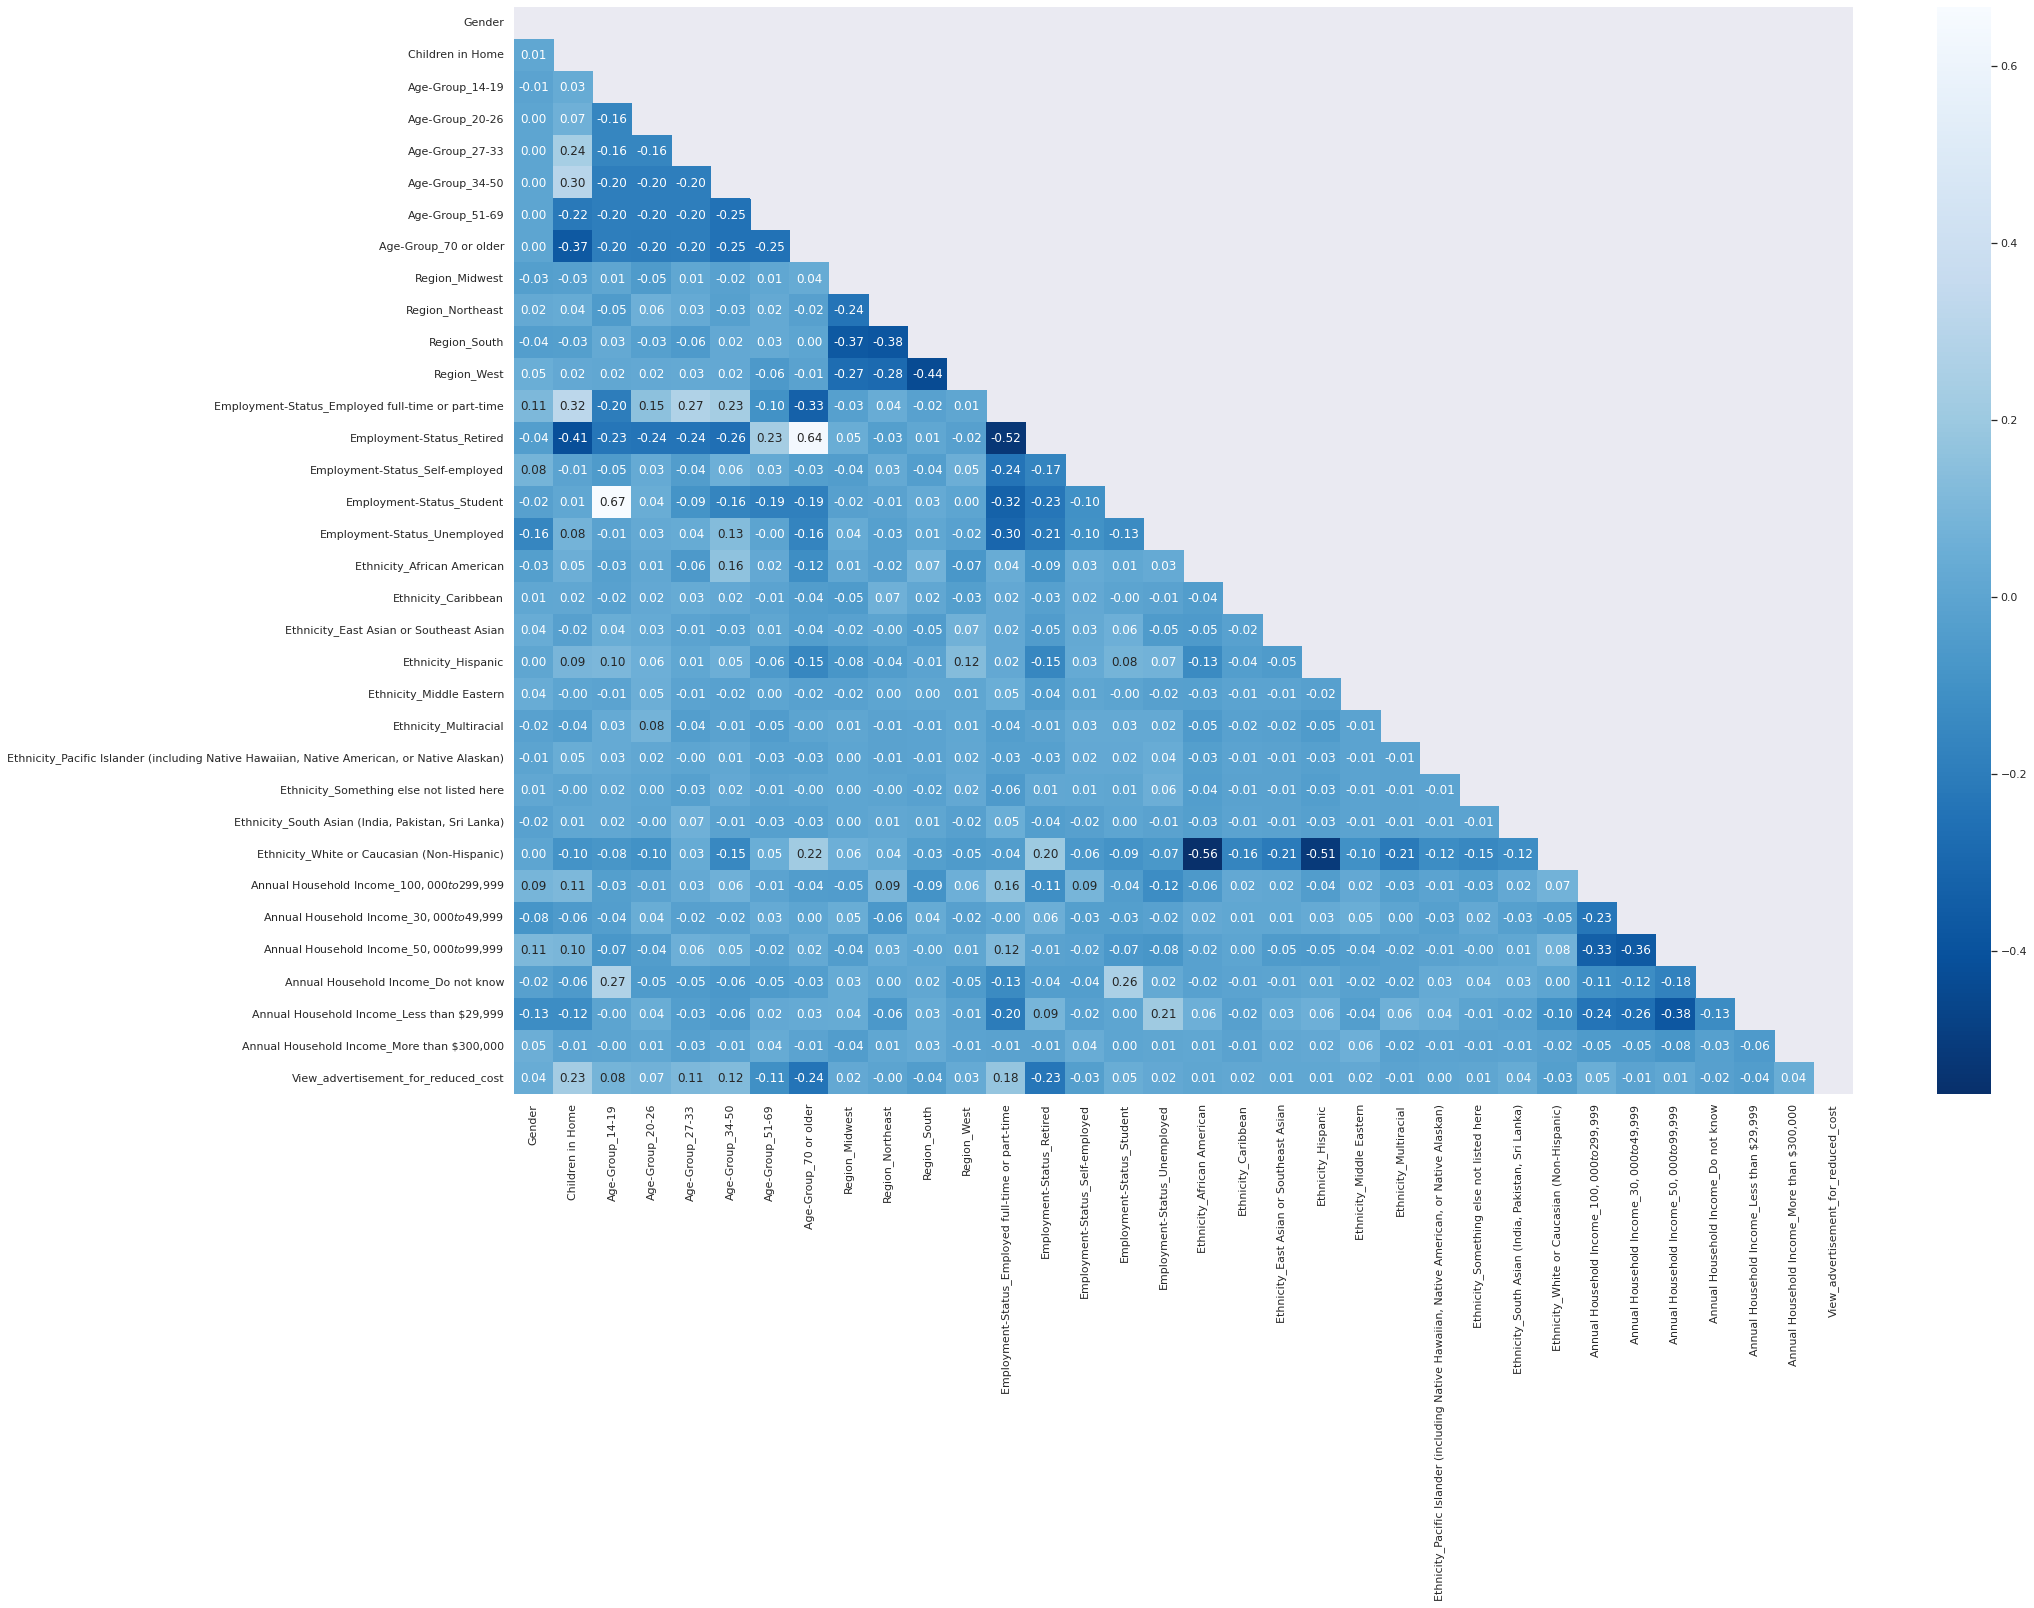

In [258]:
#checking to see if there are any highly correlated values
sns.set(rc = {'figure.figsize':(30,20)})
mask = np.triu(np.ones_like(df_reg2.corr()))
sns.heatmap(df_reg2.corr(), annot=True,fmt="0.2f",cmap = 'Blues_r',mask=mask)
plt.show()

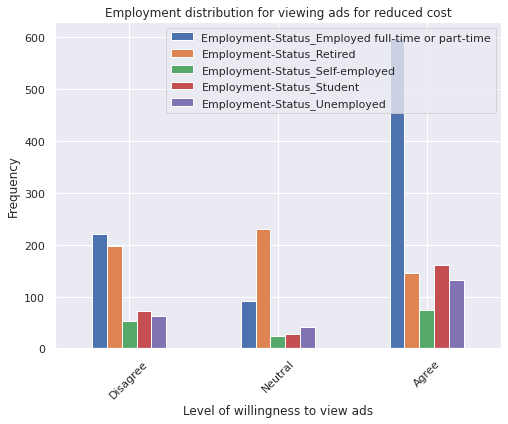

In [259]:
#Employment distribution for viewing ads for reduced cost
df_plot = df_reg2[['View_advertisement_for_reduced_cost','Employment-Status_Employed full-time or part-time','Employment-Status_Retired','Employment-Status_Self-employed','Employment-Status_Student','Employment-Status_Unemployed']].groupby('View_advertisement_for_reduced_cost').sum()
df_plot.plot.bar(title = 'Employment distribution for viewing ads for reduced cost', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to view ads')
plt.ylabel('Frequency')
plt.xticks(positions, labels)
plt.xticks(rotation = 45)
plt.show()

Based on employment status, we notice that retired people are not willing to view ads even if it reduces their cost. Whereas, all the other groups would want to view ads to reduce their subscription cost. 

To further investigate, let us plot the age distribution for retired individuals

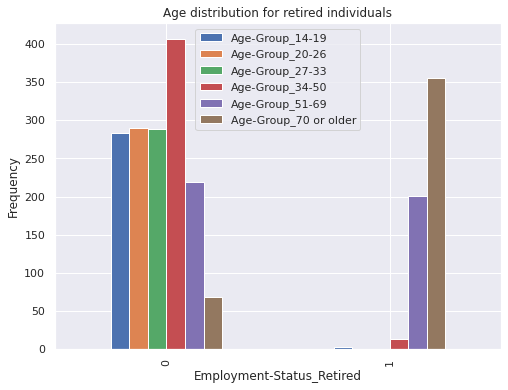

In [260]:
#Age distribution for retired individuals
df_plot = df_reg2[['Employment-Status_Retired','Age-Group_14-19','Age-Group_20-26','Age-Group_27-33','Age-Group_34-50','Age-Group_51-69','Age-Group_70 or older']].groupby('Employment-Status_Retired').sum()
df_plot.plot.bar(title = 'Age distribution for retired individuals', figsize = (8,6), grid = True)
plt.ylabel('Frequency')
plt.show()

As we can see, most of the retired individuals are in the range of 70 or older. Hence, we can also correlate this with the age factor

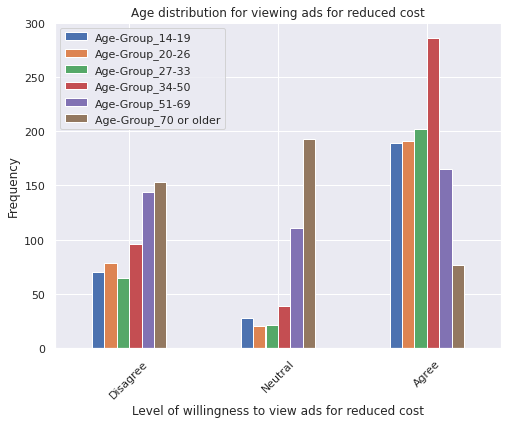

In [261]:
#Age distribution for viewing ads for reduced cost
df_plot = df_reg2[['View_advertisement_for_reduced_cost','Age-Group_14-19','Age-Group_20-26','Age-Group_27-33','Age-Group_34-50','Age-Group_51-69','Age-Group_70 or older']].groupby('View_advertisement_for_reduced_cost').sum()
df_plot.plot.bar(title = 'Age distribution for viewing ads for reduced cost', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to view ads for reduced cost')
plt.ylabel('Frequency')
plt.xticks(positions, labels)
plt.xticks(rotation = 45)
plt.show()

Similarly, we notice that older people are not willing to view ads even if it would reduce their subscription whereas, younger individuals are willling to view ads if it reduces their subscription fees

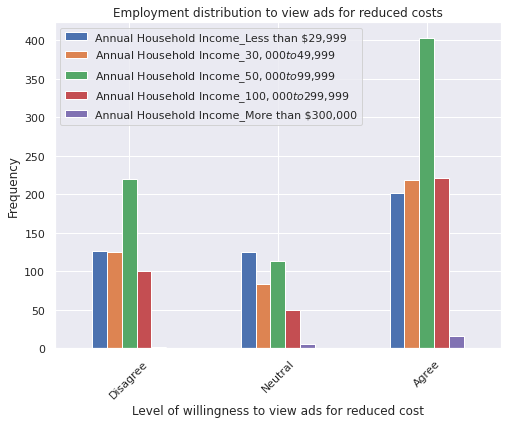

In [262]:
#Income distribution to view ads for reduced cost
df_plot = df_reg2[['View_advertisement_for_reduced_cost','Annual Household Income_Less than $29,999','Annual Household Income_$30,000 to $49,999','Annual Household Income_$50,000 to $99,999','Annual Household Income_$100,000 to $299,999','Annual Household Income_More than $300,000']].groupby('View_advertisement_for_reduced_cost').sum()
df_plot.plot.bar(title = 'Employment distribution to view ads for reduced costs', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to view ads for reduced cost')
plt.ylabel('Frequency')
plt.xticks(positions, labels)
plt.xticks(rotation = 45)
plt.show()

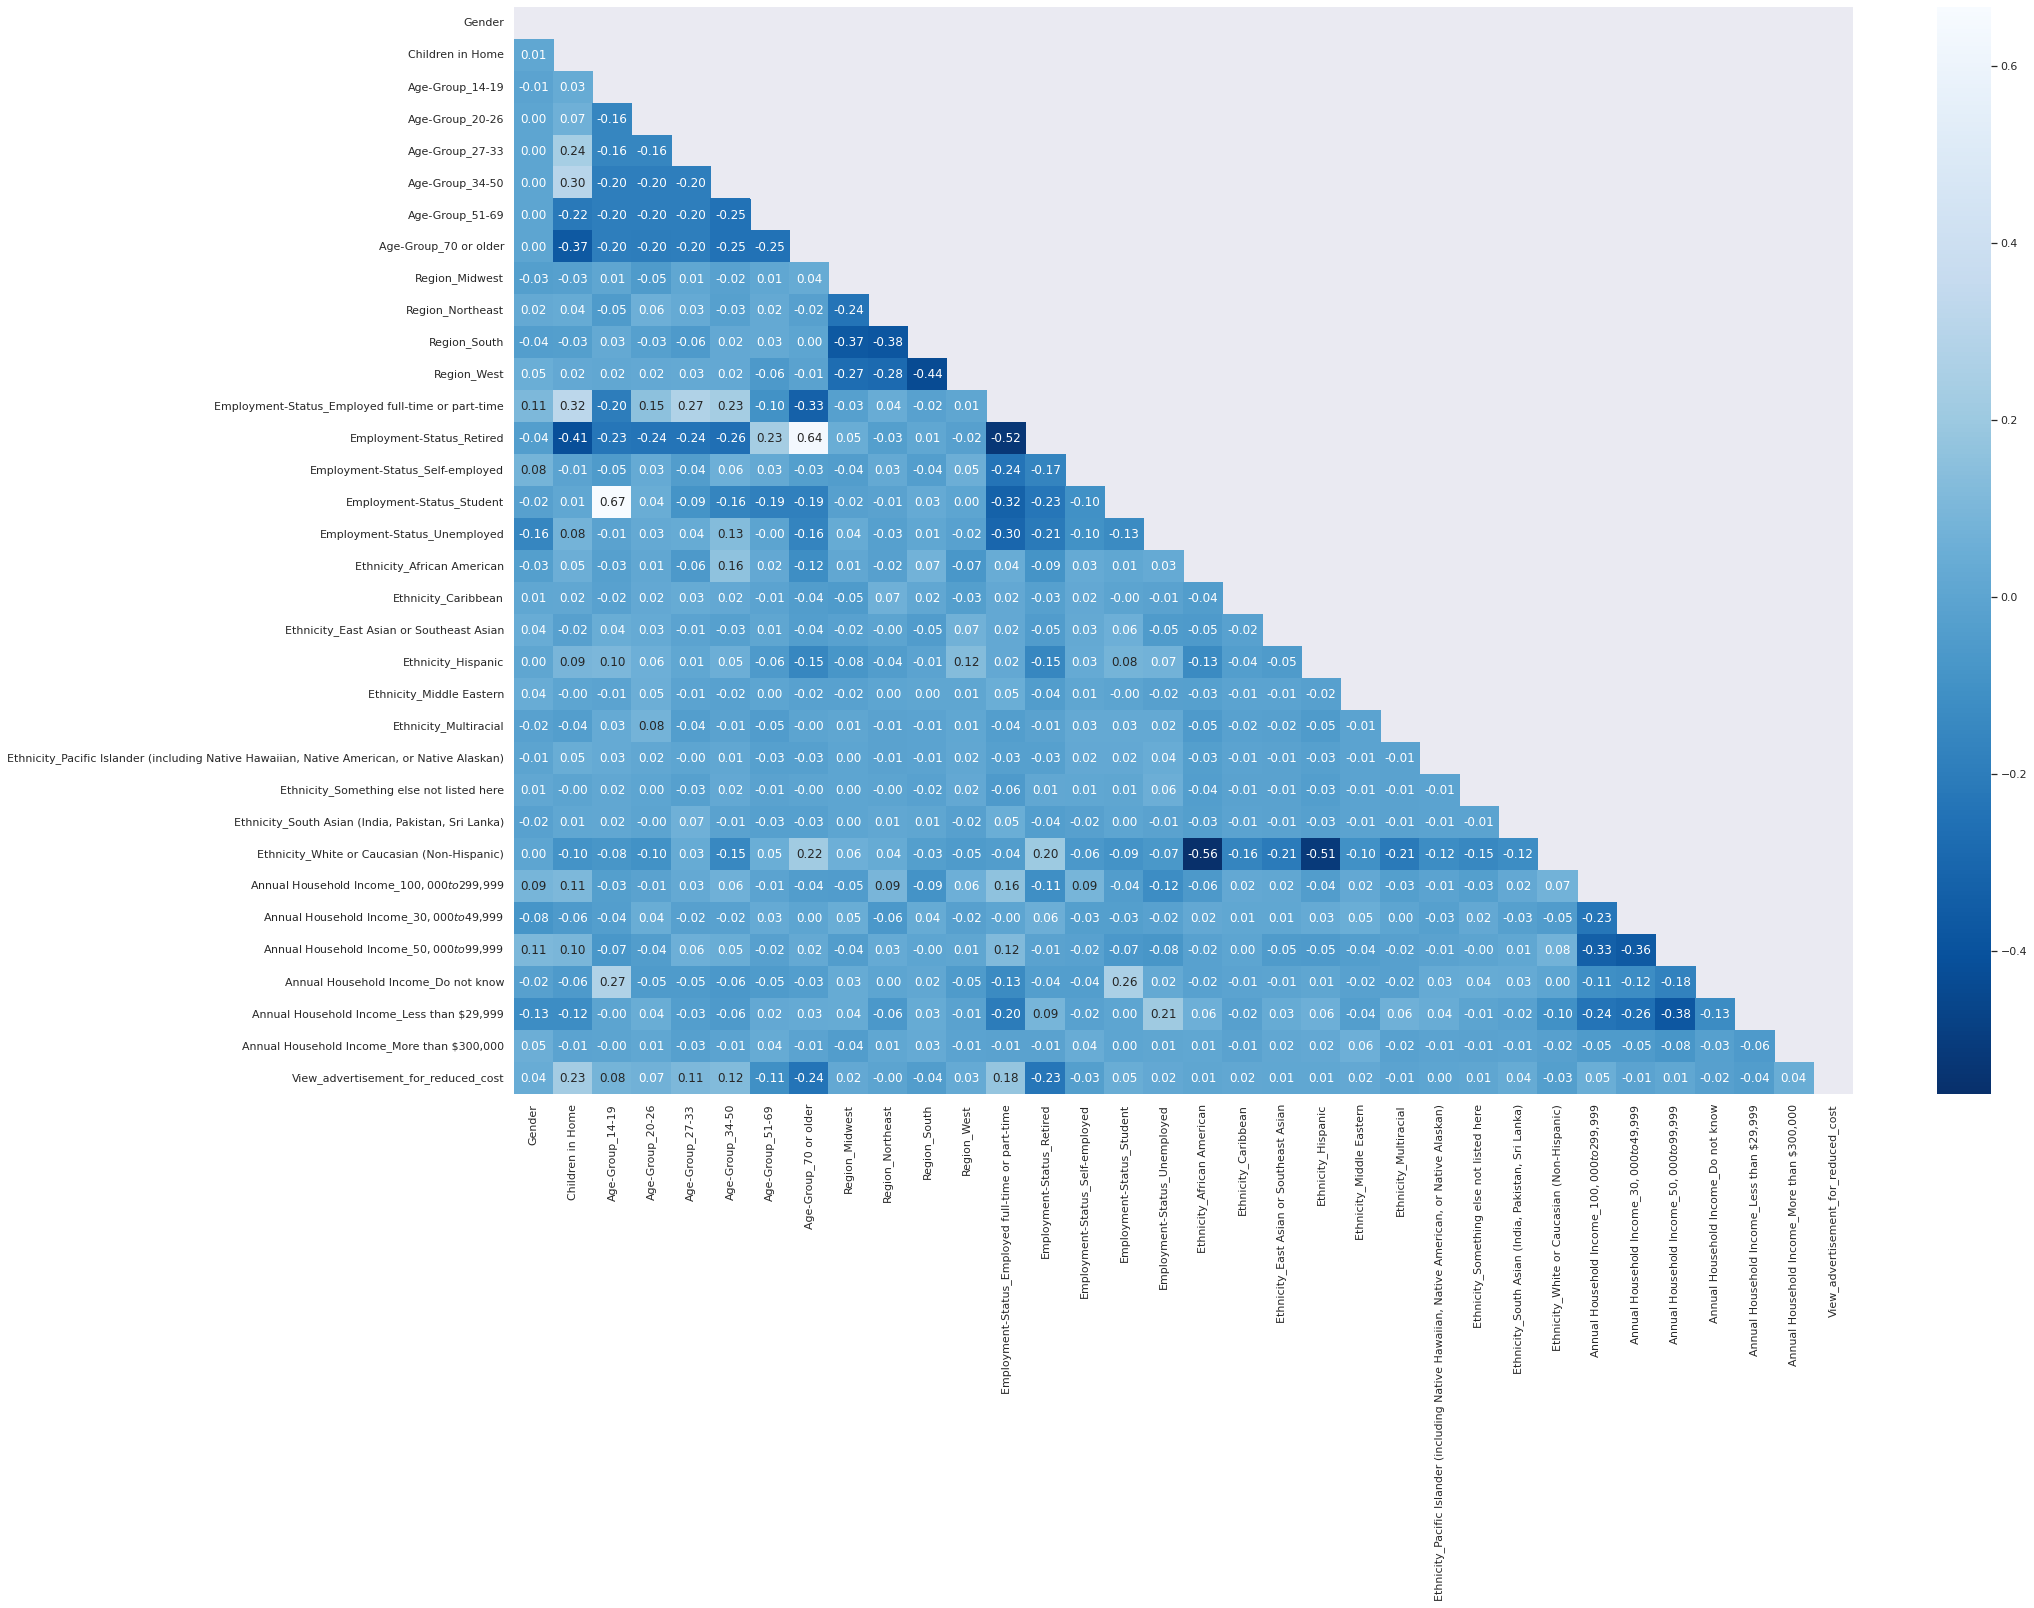

In [263]:
sns.set(rc = {'figure.figsize':(30,20)})
mask = np.triu(np.ones_like(df_reg2.corr()))
sns.heatmap(df_reg2.corr(), annot=True,fmt="0.2f",cmap = 'Blues_r',mask=mask)
plt.show()

In [264]:

X=df_reg2.loc[:, df_reg2.columns != 'View_advertisement_for_reduced_cost']
Y=df_reg2['View_advertisement_for_reduced_cost']


In [265]:
#training-75%, testing-25%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [266]:
#creating an instance of the Logistic Regression Model. 
#We use the solver sag since it performs better for large datasets, handles l2 penalty and deals with multi-class problems
#By setting multi_class variable to its multinomial category and setting tolerance, we ensure that the model gives better accuracy
lreg=LogisticRegression(solver = "sag",multi_class='multinomial',tol=0.1)
#training the model and predicting labels for the test data
lreg.fit(X_train,Y_train)
ypred=lreg.predict(X_test)
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

          -1       0.35      0.15      0.21       150
           0       0.41      0.31      0.36        99
           1       0.64      0.88      0.74       284

    accuracy                           0.57       533
   macro avg       0.47      0.45      0.44       533
weighted avg       0.51      0.57      0.52       533



For our second target variable : Viewing ads for reduced cost, we get an accuracy of 57%

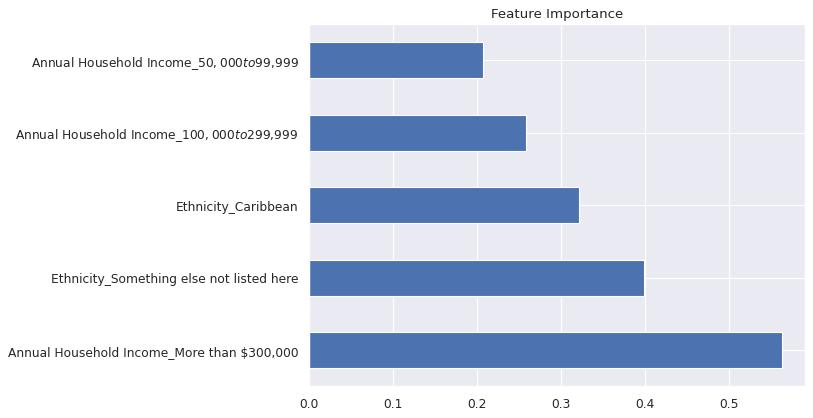

In [267]:
#Analyzing the top 5 features from our model
importance = lreg.coef_[0]
feat_importances = pd.Series(abs(importance),index = X_test.columns)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
feat_importances.nlargest(5).plot(kind='barh',title = 'Feature Importance');

We can see that Age and Annual Income plays a pivotal role in our model

In [268]:
#regression on our 3rd target variable
data['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].unique()

array([nan,
       'I am willing to pay $20 per month on top of what I already pay',
       'I am willing to pay $5 per month on top of what I already pay',
       'I am willing to pay $10 per month on top of what I already pay',
       'I prefer faster speed but I am unwilling to pay more than I already do',
       'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',
       'I am willing to pay $30 or more per month on top of what I already pay'],
      dtype=object)

In [269]:
data['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].fillna(0, inplace=True)
df_reg3=df_dummies.copy()
df_reg3['Willing_to_pay_more_to_double_download_speed']=data['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].replace({'I am willing to pay $20 per month on top of what I already pay' : 1, 'I am willing to pay $10 per month on top of what I already pay' : 1, 'I am willing to pay $5 per month on top of what I already pay' : 1, 'I prefer faster speed but I am unwilling to pay more than I already do' : np.nan, 'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs': 0, 'I am willing to pay $30 or more per month on top of what I already pay': 1  })
df_reg3 = df_reg3[df_reg3['Willing_to_pay_more_to_double_download_speed'].notna()]
df_reg3.head()

,Gender,Children in Home,Age-Group_14-19,Age-Group_20-26,Age-Group_27-33,Age-Group_34-50,Age-Group_51-69,Age-Group_70 or older,Region_Midwest,Region_Northeast,...,Ethnicity_Something else not listed here,"Ethnicity_South Asian (India, Pakistan, Sri Lanka)",Ethnicity_White or Caucasian (Non-Hispanic),"Annual Household Income_$100,000 to $299,999","Annual Household Income_$30,000 to $49,999","Annual Household Income_$50,000 to $99,999",Annual Household Income_Do not know,"Annual Household Income_Less than $29,999","Annual Household Income_More than $300,000",Willing_to_pay_more_to_double_download_speed
0,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1.0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0.0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1.0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1.0


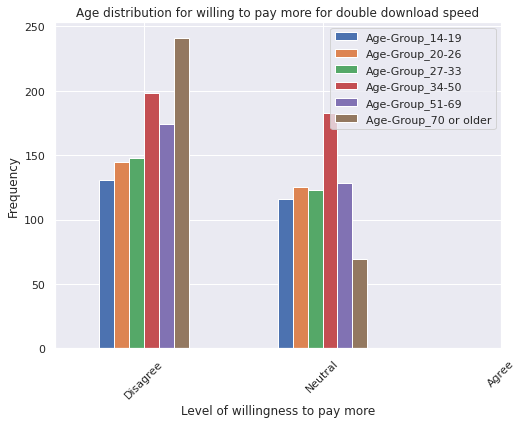

In [270]:
#'Age distribution for willing to pay more for double download speed
df_plot = df_reg3[['Willing_to_pay_more_to_double_download_speed','Age-Group_14-19','Age-Group_20-26','Age-Group_27-33','Age-Group_34-50','Age-Group_51-69','Age-Group_70 or older']].groupby('Willing_to_pay_more_to_double_download_speed').sum()
df_plot.plot.bar(title = 'Age distribution for willing to pay more for double download speed', figsize = (8,6), grid = True)
plt.xlabel('Level of willingness to pay more')
plt.ylabel('Frequency')
plt.xticks(positions, labels)
plt.xticks(rotation = 45)
plt.show()

While most people are not willing to pay more for double download speed, older people are even less likely to pay for double download speed as the are okay with their current speed. Since, they also don't binge watch as often as younger people, they don't have an issue with the download speed that they have. 


In [271]:
X=df_reg3.loc[:, df_reg3.columns != 'Willing_to_pay_more_to_double_download_speed']
Y=df_reg3['Willing_to_pay_more_to_double_download_speed']

In [272]:
#training-75%, testing-25%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [273]:
lreg=LogisticRegression(solver = "sag",multi_class='multinomial',tol=0.1)
#training the model and predicting labels for the test data
lreg.fit(X_train,Y_train)
ypred=lreg.predict(X_test)
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69       250
         1.0       0.57      0.36      0.44       196

    accuracy                           0.60       446
   macro avg       0.59      0.58      0.57       446
weighted avg       0.59      0.60      0.58       446



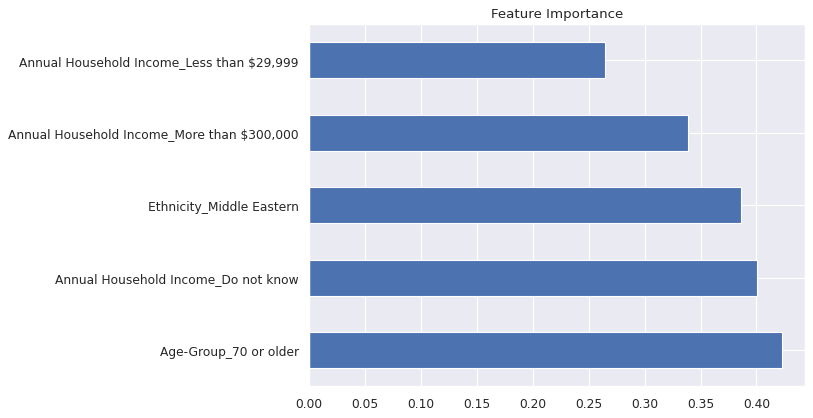

In [274]:
#plotting the top 5 features 
importance = lreg.coef_[0] 
feat_importances = pd.Series(importance,index = X_test.columns)
feat_importances=abs(feat_importances)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
feat_importances.nlargest(5).plot(kind='barh',title = 'Feature Importance');

## **Conclusion**

As we notice, Age plays a pivotal role in determining the factors related to advertisements and download speeds with respect to costs. Based on the above analysis, as a company we can look to increase our revenue by targeting these customers with susbcription models that they can purchase that are better suited to their needs.

Apart from the current subscription model, the company can introduce two more new subscription models targeted to -

1. **Younger Users:** Lower subscription fees, Faster Data Speeds and Increased Number of Ads
(By increasing the number of ads, the company can increase their revenue by providing targeted ads to these customers through which they can provide these customers with a lower subscription model. Since younger users are also more prone to binge-watching and have a higher percentage of watching behavior, we can also provide them with faster data speeds)

2. **Older Users:** Higher subscription fees, Slower Data Speeds and Fewer Ads
(By increasing their subscription fees, the company would be able to provide fewer ads as a premium model and generate revenue. Since older users have a lower percentage of watching behavior and are not as prone to binge watching, we can provide them with slower data speeds)